In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import nlkt
from google.colab import drive

%matplotlib inline

In [ ]:
drive.mount("/content/drive/")
%cd "drive/MyDrive/Data Analysis /datasets"

In [ ]:
pd.set_option('display.max_columns', 500)

In [ ]:
reg_data = pd.read_excel("/content/drive/MyDrive/Topics /Research/AIF_Private_Sector/00_datasets/merged_fin2.xlsx")

In [ ]:
reg_data = pd.read_csv("data.csv", index_col=0)

In [ ]:
reg_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9847 entries, 0 to 9846
Data columns (total 30 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Title                                                    9847 non-null   object 
 1   ISIN                                                     9847 non-null   object 
 2   BvD9_ID                                                  9847 non-null   int64  
 3   BvD_ID                                                   9847 non-null   object 
 4   PAI7                                                     9847 non-null   float64
 5   Zone                                                     9847 non-null   object 
 6   Country                                                  9847 non-null   object 
 7   Generic Sector                                           9847 non-null   object 
 8   Sector Zone                 

In [ ]:
continous_columns = ["Total Liabilities", "Operating Income", "Number of Employees", "Price To Book Value Per Share (Daily Time Series Ratio)", "Net Profit Margin, (%)"]

for column in continous_columns:
  reg_data[column] = pd.to_numeric(reg_data[column], errors='coerce')

In [ ]:
reg_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9847 entries, 0 to 9846
Data columns (total 30 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Title                                                    9847 non-null   object 
 1   ISIN                                                     9847 non-null   object 
 2   BvD9_ID                                                  9847 non-null   int64  
 3   BvD_ID                                                   9847 non-null   object 
 4   PAI7                                                     9847 non-null   float64
 5   Zone                                                     9847 non-null   object 
 6   Country                                                  9847 non-null   object 
 7   Generic Sector                                           9847 non-null   object 
 8   Sector Zone                 

In [ ]:
reg_data.head()

Title          ISIN    BvD9_ID        BvD_ID  \
0  Downstream Development Authority   KVE00002139   50854901  US161977521L   
1  Greenko Energy Holdings Pvt Ltd.  INE562W08010   39824327   GBIM001805V   
2            Antero Resources Corp.  US03674X1063  163594809   US800162034   
3                  Oglethorpe Power  US677050AC00     475740   US581211925   
4          Oil-Dri Corp. of America  US6778641000      31040   US362048898   

       PAI7 Zone                   Country                   Generic Sector  \
0  1.000000  NAM  United States of America  Hotel, Leisure Goods & Services   
1  1.000000  ROW                     India         Electric & Gas Utilities   
2  0.700718  NAM  United States of America                           Energy   
3  0.651772  NAM  United States of America         Electric & Gas Utilities   
4  0.586957  NAM  United States of America                  Mining & Metals   

                                     Sector Zone  Reporting year domesticSOE  \
0  Hotel, Leisure Goods & Services North America            2023         SOE   
1       Electric & Gas Utilities Emerging Market            2023     Non-SOE   
2                           Energy North America            2023     Non-SOE   
3         Electric & Gas Utilities North America            2023     Non-SOE   
4                  Mining & Metals North America            2023     Non-SOE   

  Infra / Non-Infra               Region RTG_SP_LT_FC_ISSUER_CREDIT  \
0             Infra        North America                        NaN   
1             Infra  East Asia & Pacific                        NaN   
2             Infra        North America                        BB+   
3             Infra        North America                        NaN   
4             Infra        North America                        NaN   

  rating_letter_category  rating_2_category             moody_country iso3  \
0                    NaN                NaN  United States of America  USA   
1                    NaN                NaN                     India  IND   
2                      B  speculative-grade  United States of America  USA   
3                    NaN                NaN  United States of America  USA   
4                    NaN                NaN  United States of America  USA   

       region_wb         income_group           GDP    Population  \
0  North America          High income  2.050000e+13  3.271674e+08   
1     South Asia  Lower middle income  2.720000e+12  1.352617e+09   
2  North America          High income  2.050000e+13  3.271674e+08   
3  North America          High income  2.050000e+13  3.271674e+08   
4  North America          High income  2.050000e+13  3.271674e+08   

   Number of Controversies\n(Overall)  Number of Controversies\n(Environment)  \
0                                 0.0                                     NaN   
1                                 0.0                                     NaN   
2                                 0.0                                     NaN   
3                                 0.0                                     NaN   
4                                 0.0                                     NaN   

    TotalAssets  Total Liabilities  Operating Income  Number of Employees  \
0           NaN                NaN               NaN                  NaN   
1           NaN                NaN               NaN                  NaN   
2  1.411804e+10       7.363481e+09      2.527709e+09                599.0   
3  1.648937e+10       1.529724e+10      1.940510e+08                323.0   
4  2.496110e+08       9.889300e+07      4.821000e+06                869.0   

   Price To Book Value Per Share (Daily Time Series Ratio)  \
0                                                NaN         
1                                                NaN         
2                                           1.001293         
3                                                NaN         
4                                 

In [ ]:
reg_data.columns

Index(['Title', 'ISIN', 'BvD9_ID', 'BvD_ID', 'PAI7', 'Zone', 'Country',
       'Generic Sector', 'Sector Zone', 'Reporting year', 'domesticSOE',
       'Infra / Non-Infra', 'Region', 'RTG_SP_LT_FC_ISSUER_CREDIT',
       'rating_letter_category', 'rating_2_category', 'moody_country', 'iso3',
       'region_wb', 'income_group', 'GDP', 'Population',
       'Number of Controversies\n(Overall)',
       'Number of Controversies\n(Environment)', 'TotalAssets',
       'Total Liabilities', 'Operating Income', 'Number of Employees',
       'Price To Book Value Per Share (Daily Time Series Ratio)',
       'Net Profit Margin, (%)'],
      dtype='object')

In [ ]:
important_targets = [
    "rating_letter_category", "rating_2_category", 'Number of Controversies\n(Overall)','Number of Controversies\n(Environment)','TotalAssets',
       'Total Liabilities', 'Operating Income', 'Number of Employees',
       'Price To Book Value Per Share (Daily Time Series Ratio)',
       'Net Profit Margin, (%)'
]

imputation_thresh = 1e3
count = 0
for column in reg_data.columns:
  amount = reg_data[column].isnull().sum()
  saved_col = any([target_column in column for target_column in important_targets])
  if amount > 0 and amount >= imputation_thresh and not saved_col:
    count += 1
    # print(f"Column {column} has {amount} of missing data, dropping.")
    reg_data.drop(columns=column, inplace=True)
  elif amount != 0 and amount < imputation_thresh:
    print(f"Column {column} has {amount} of missing data, possible to impute")
print("Count:", count)

Column income_group has 1 of missing data, possible to impute
Column GDP has 145 of missing data, possible to impute
Column Population has 141 of missing data, possible to impute
Column Number of Controversies
(Overall) has 91 of missing data, possible to impute
Column TotalAssets has 843 of missing data, possible to impute
Column Total Liabilities has 787 of missing data, possible to impute
Column Net Profit Margin, (%) has 982 of missing data, possible to impute
Count: 0


In [ ]:
reg_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9847 entries, 0 to 9846
Data columns (total 29 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Title                                                    9847 non-null   object 
 1   ISIN                                                     9847 non-null   object 
 2   BvD9_ID                                                  9847 non-null   int64  
 3   BvD_ID                                                   9847 non-null   object 
 4   PAI7                                                     9847 non-null   float64
 5   Zone                                                     9847 non-null   object 
 6   Country                                                  9847 non-null   object 
 7   Generic Sector                                           9847 non-null   object 
 8   Sector Zone                 

In [ ]:
reg_data.columns

Index(['Title', 'ISIN', 'BvD9_ID', 'BvD_ID', 'PAI7', 'Zone', 'Country',
       'Generic Sector', 'Sector Zone', 'Reporting year', 'domesticSOE',
       'Infra / Non-Infra', 'Region', 'rating_letter_category',
       'rating_2_category', 'moody_country', 'iso3', 'region_wb',
       'income_group', 'GDP', 'Population',
       'Number of Controversies\n(Overall)',
       'Number of Controversies\n(Environment)', 'TotalAssets',
       'Total Liabilities', 'Operating Income', 'Number of Employees',
       'Price To Book Value Per Share (Daily Time Series Ratio)',
       'Net Profit Margin, (%)'],
      dtype='object')

In [ ]:
exclusion_targets = [
    "Title", "ISIN", "BvD9_ID", "BvD_ID", "Sector Zone"
]
pred_col = "PAI7"
analysis_data = reg_data.drop(columns=exclusion_targets)
analysis_data

PAI7 Zone                   Country  \
0     1.000000  NAM  United States of America   
1     1.000000  ROW                     India   
2     0.700718  NAM  United States of America   
3     0.651772  NAM  United States of America   
4     0.586957  NAM  United States of America   
...        ...  ...                       ...   
9842  0.000000   AP                     Japan   
9843  0.000000   AP                     Japan   
9844  0.000000   AP                     Japan   
9845  0.000000   AP                     Japan   
9846  0.000000  ROW                   Morocco   

                        Generic Sector  Reporting year domesticSOE  \
0      Hotel, Leisure Goods & Services            2023         SOE   
1             Electric & Gas Utilities            2023     Non-SOE   
2                               Energy            2023     Non-SOE   
3             Electric & Gas Utilities            2023     Non-SOE   
4                      Mining & Metals            2023     Non-SOE   
...                                ...             ...         ...   
9842          Electric & Gas Utilities            2023     Non-SOE   
9843                         Chemicals            2023     Non-SOE   
9844            Software & IT Services            2023     Non-SOE   
9845         Business Support Services            2023     Non-SOE   
9846  Financial Services - Real Estate            2023     Non-SOE   

     Infra / Non-Infra                      Region rating_letter_category  \
0                Infra               North America                    NaN   
1                Infra         East Asia & Pacific                    NaN   
2                Infra               North America                      B   
3                Infra               North America                    NaN   
4                Infra               North America                    NaN   
...                ...                         ...                    ...   
9842             Infra         East Asia & Pacific                    NaN   
9843         Non-Infra         East Asia & Pacific                    NaN   
9844             Infra         East Asia & Pacific                    NaN   
9845         Non-Infra         East Asia & Pacific                    NaN   
9846         Non-Infra  Middle East & North Africa                    NaN   

      rating_2_category             moody_country iso3  \
0                   NaN  United States of America  USA   
1                   NaN                     India  IND   
2     speculative-grade  United States of America  USA   
3                   NaN  United States of America  USA   
4                   NaN  United States of America  USA   
...                 ...                       ...  ...   
9842                NaN                     Japan  JPN   
9843                NaN                     Japan  JPN   
9844                NaN                     Japan  JPN   
9845                NaN                     Japan  JPN   
9846                NaN                   Morocco  MAR   

                       region_wb         income_group           GDP  \
0                  North America          High income  2.050000e+13   
1                     South Asia  Lower middle income  2.720000e+12   
2                  North America          High income  2.050000e+13   
3                  North America          High income  2.050000e+13   
4                  North America          High income  2.050000e+13   
...                          ...                  ...           ...   
9842         East Asia & Pacific          High income  4.970000e+12   
9843         East Asia & Pacific          High income  4.970000e+12   
9844         East Asia & Pacific          High income  4.970000e+12   
9845         East Asia & Pacific          High income  4.970000e+12   
9846  Middle East & North Africa  Lower middle income  1.180000e+11   

        Population  Number of Controversies\n(Overall)  \
0     3.271674e+08                             

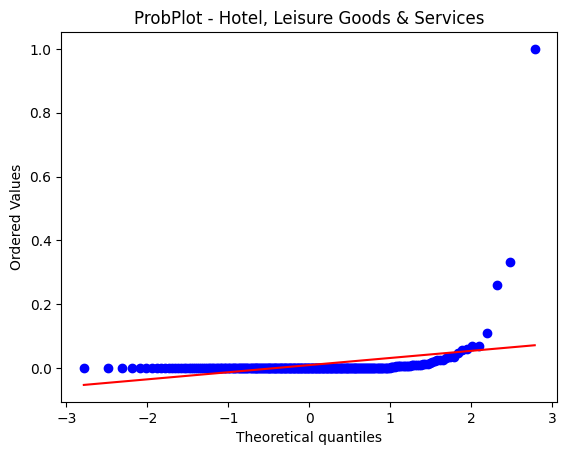

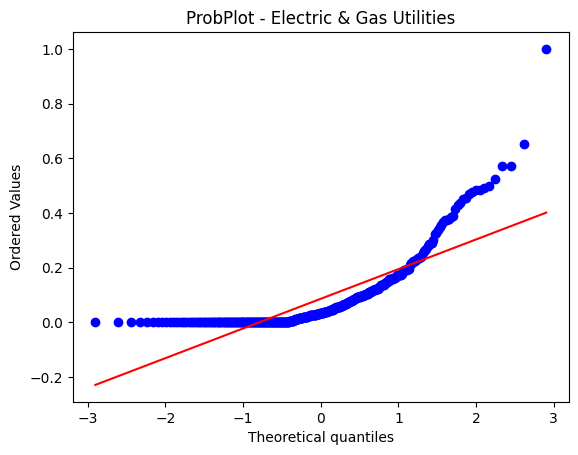

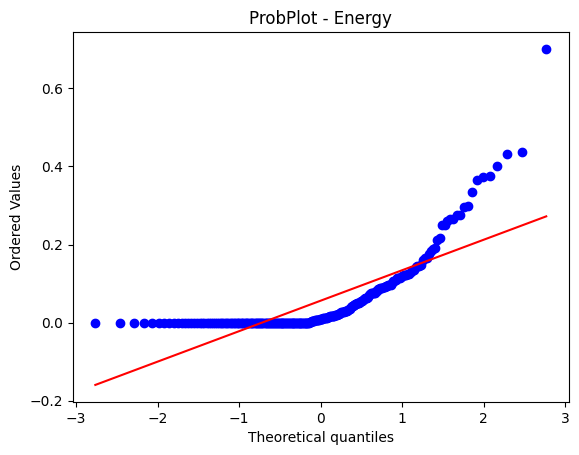

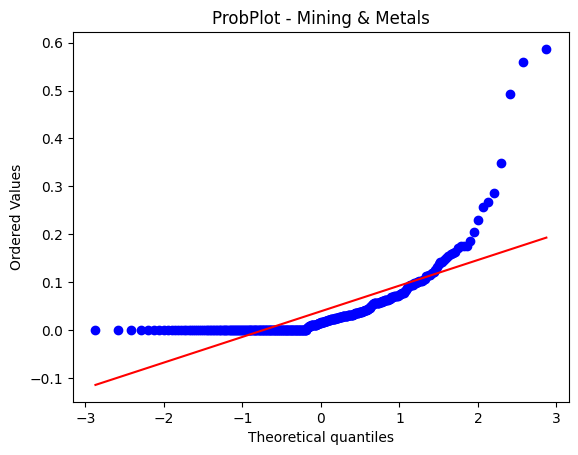

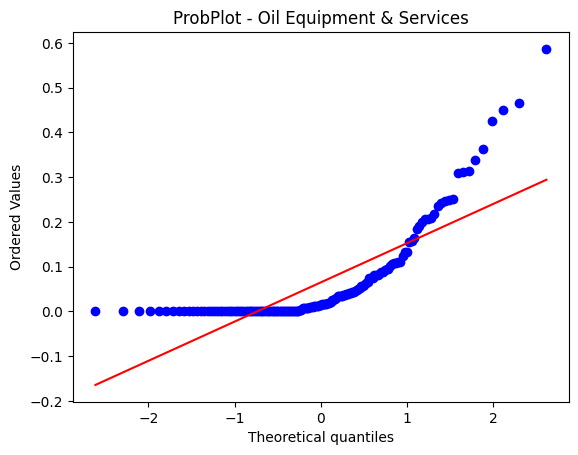

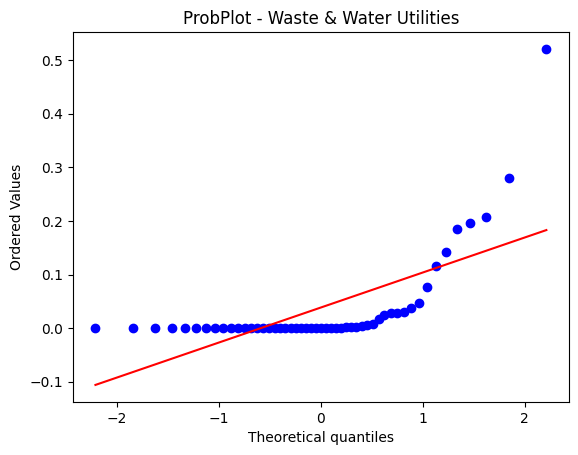

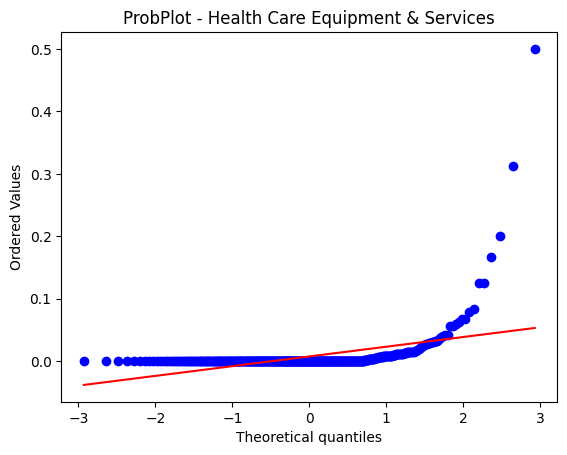

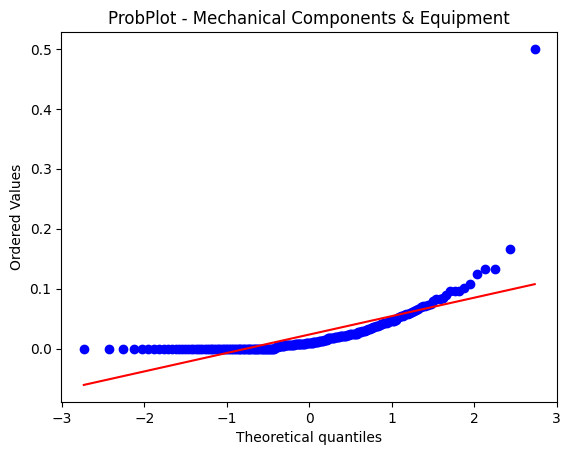

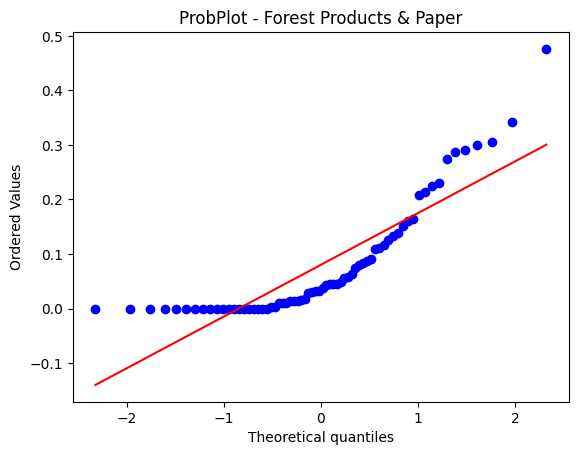

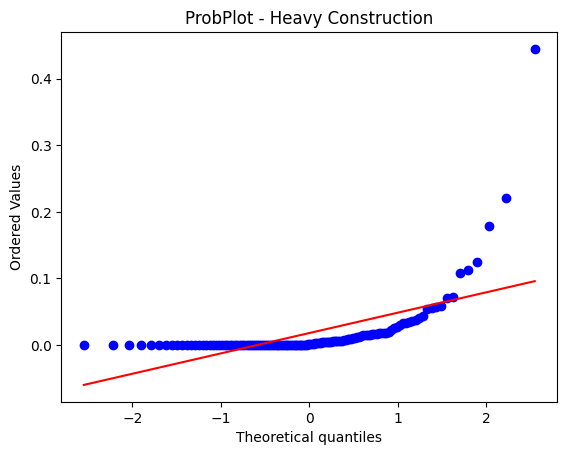

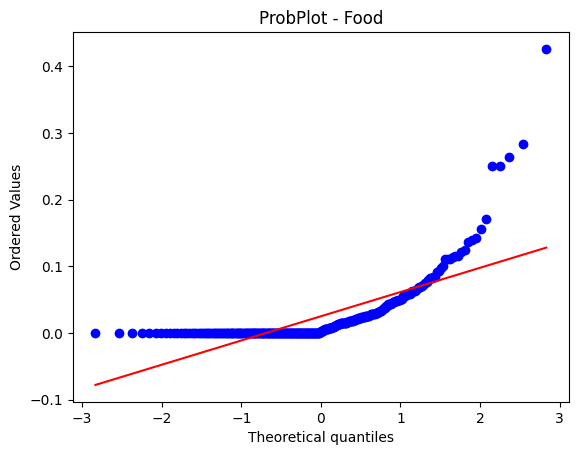

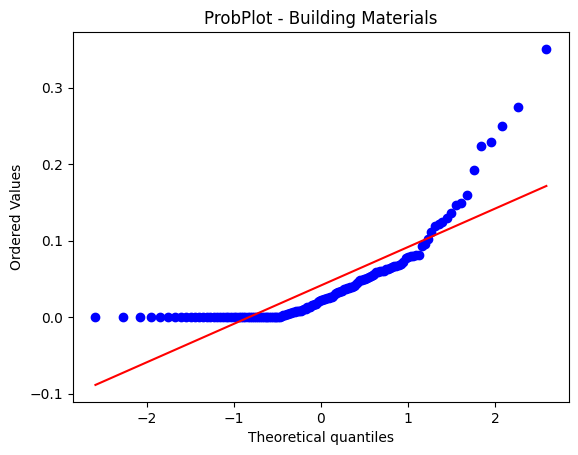

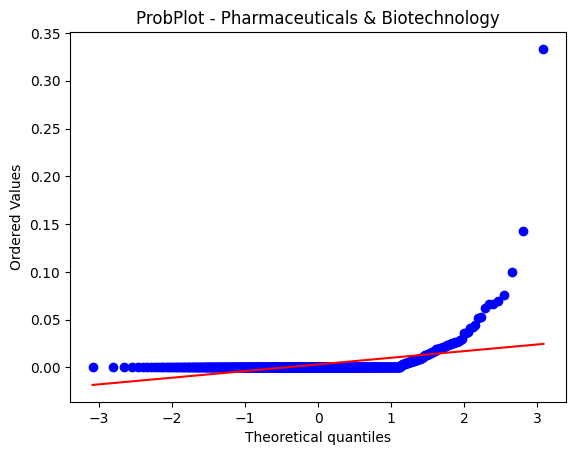

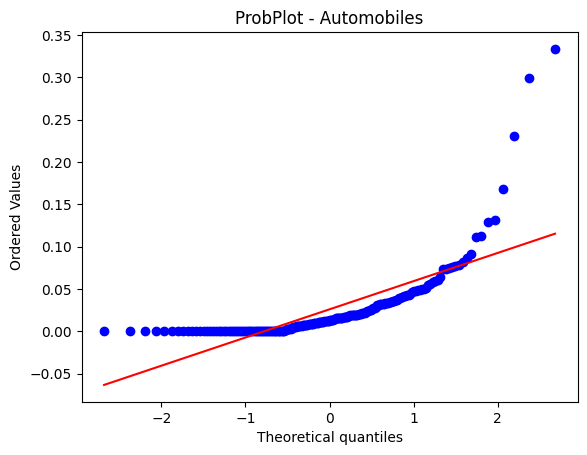

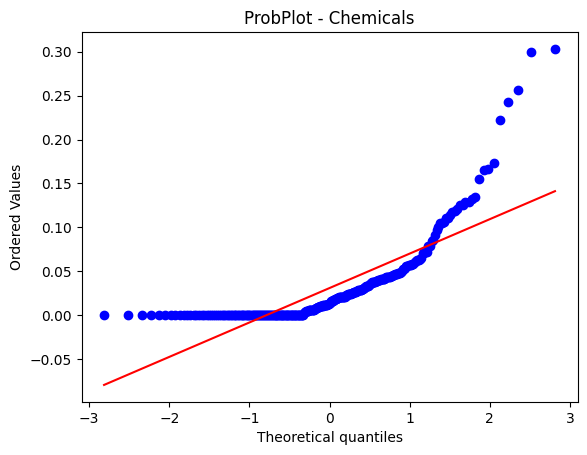

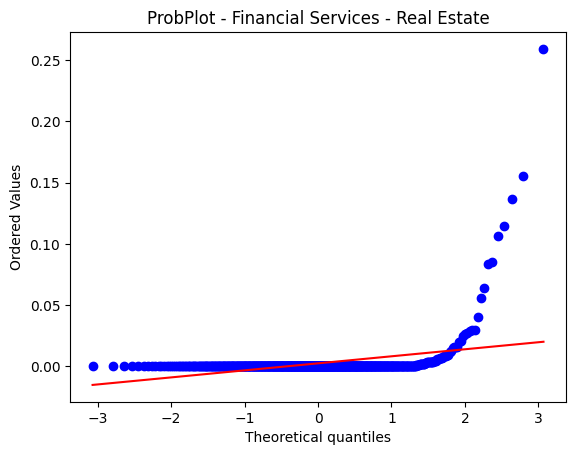

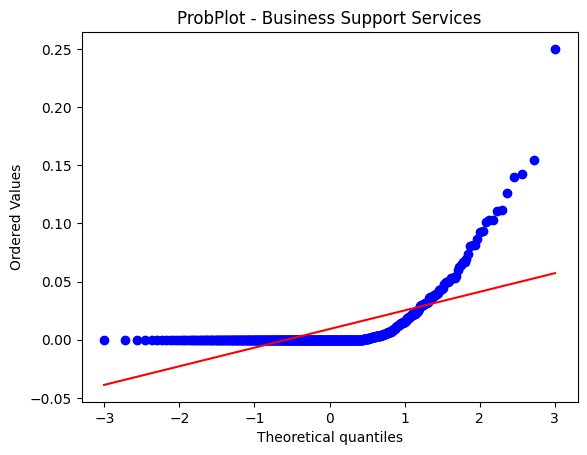

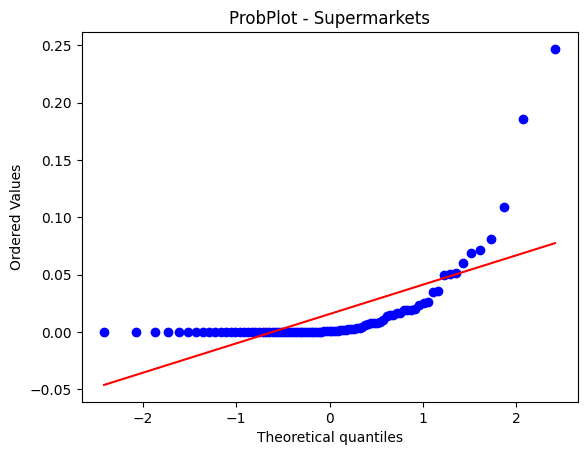

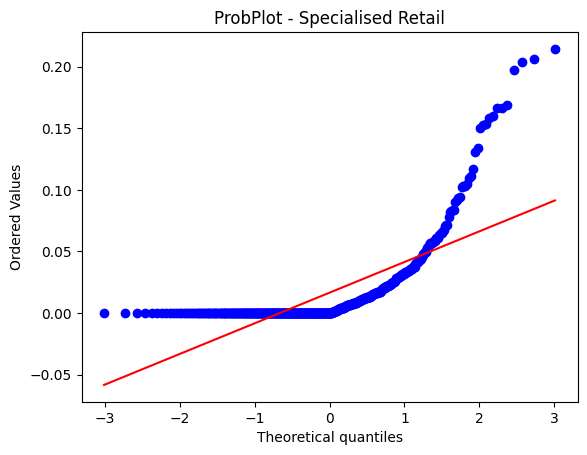

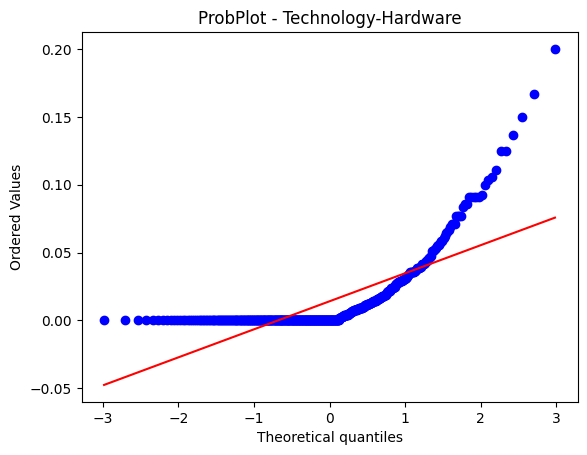

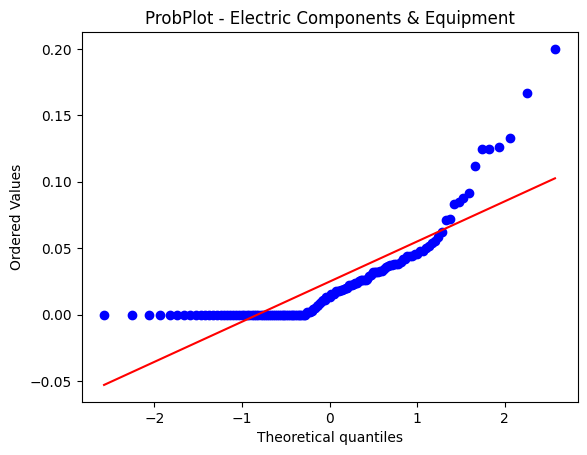

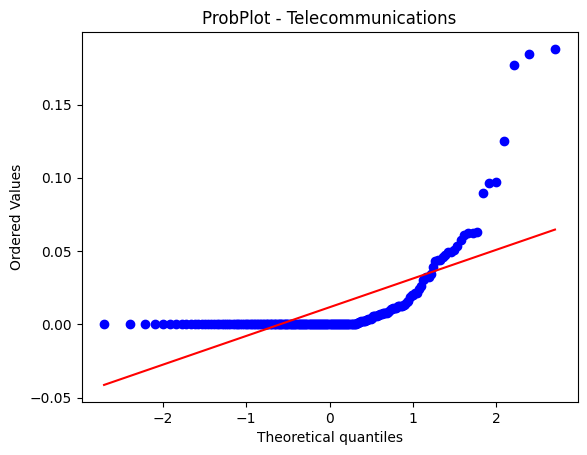

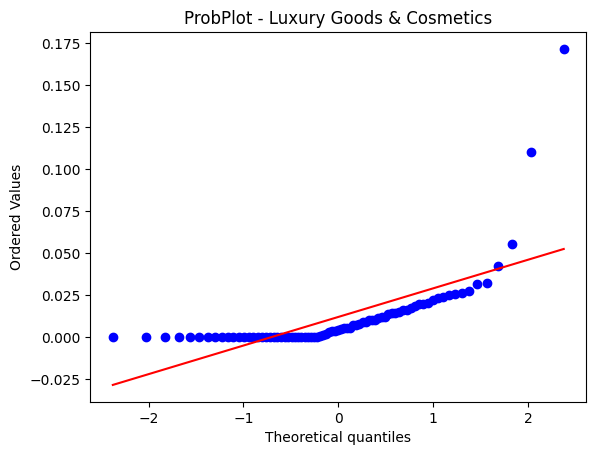

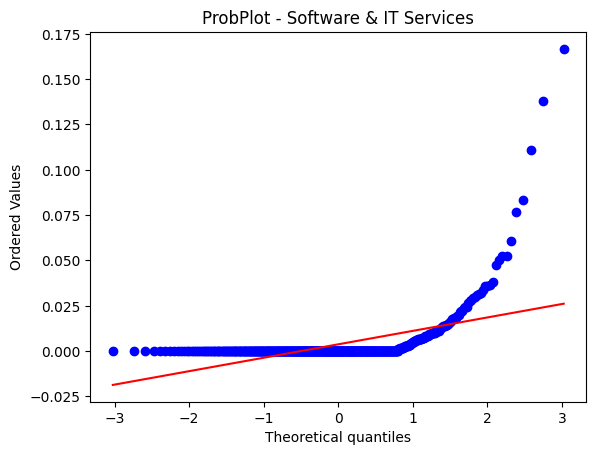

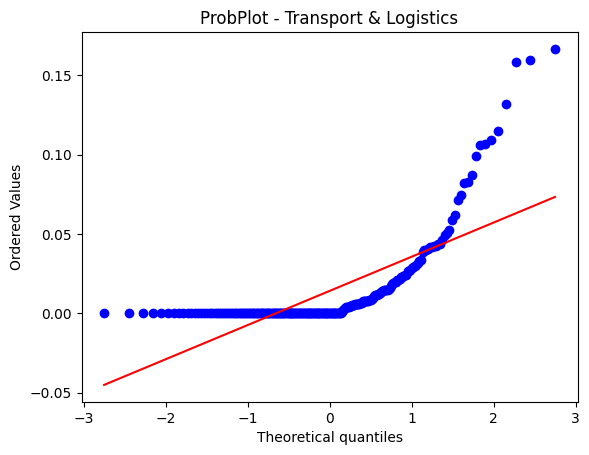

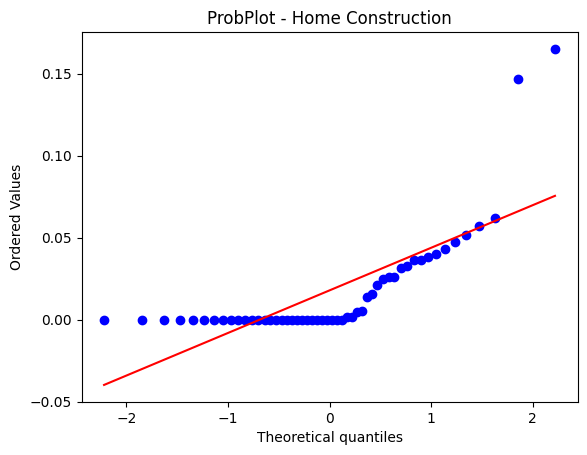

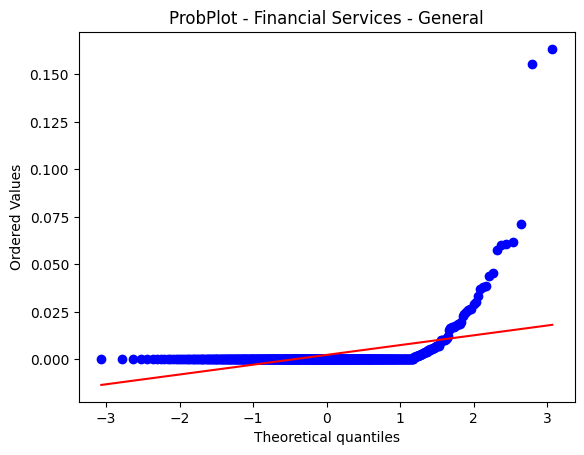

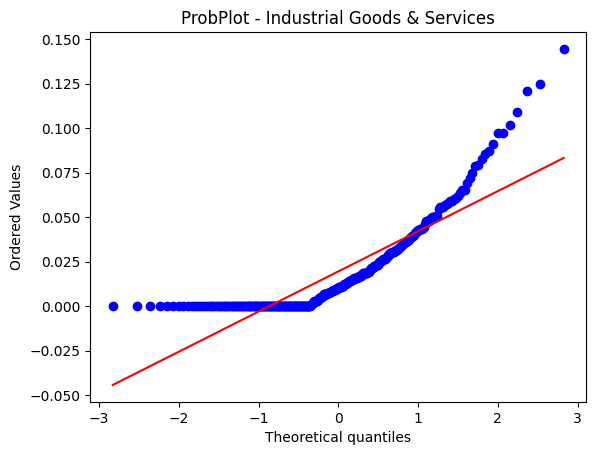

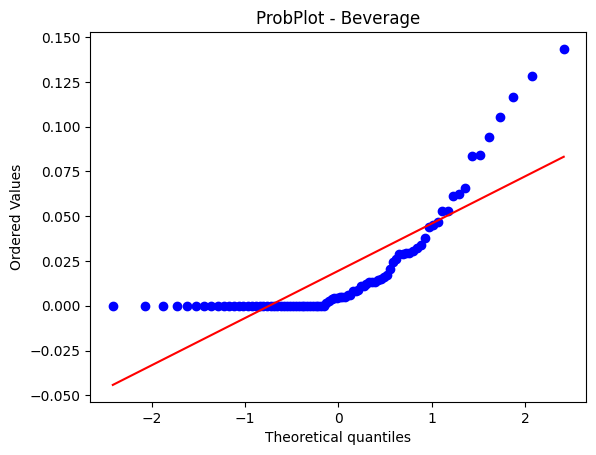

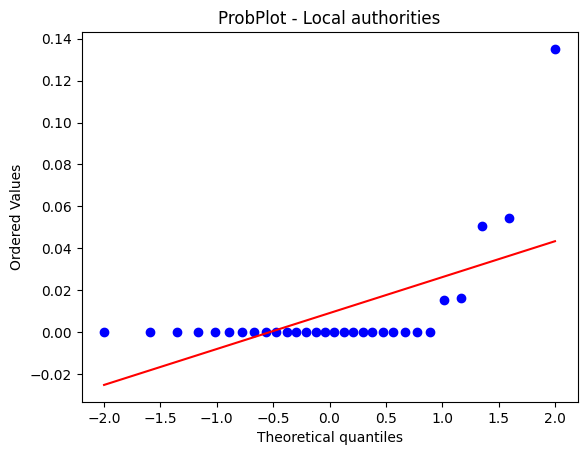

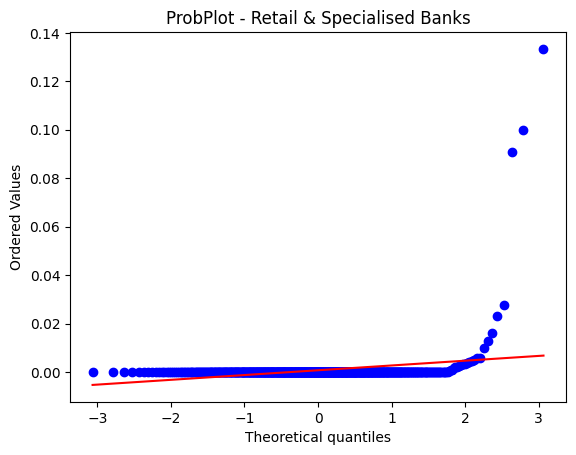

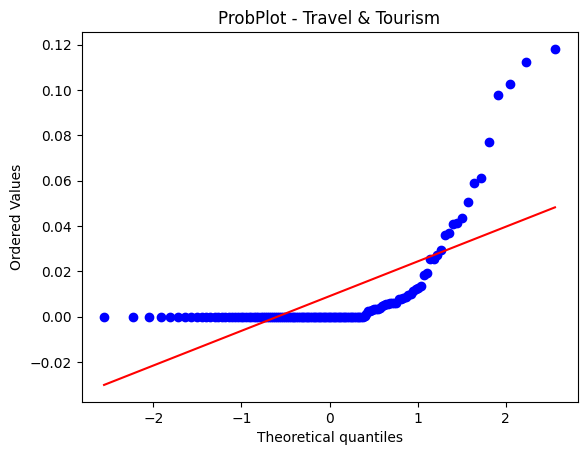

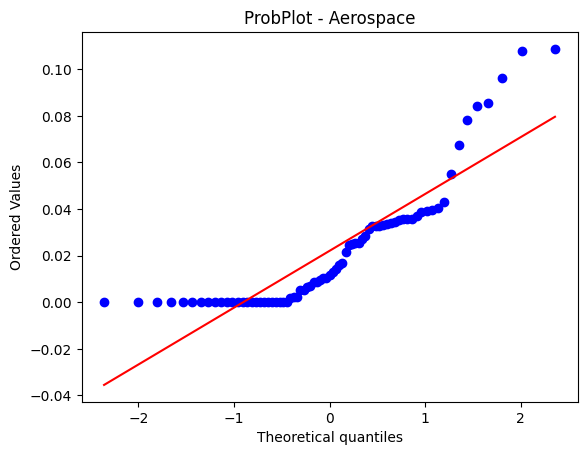

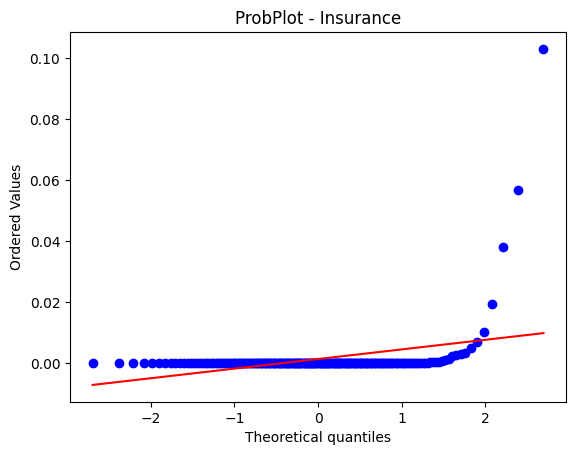

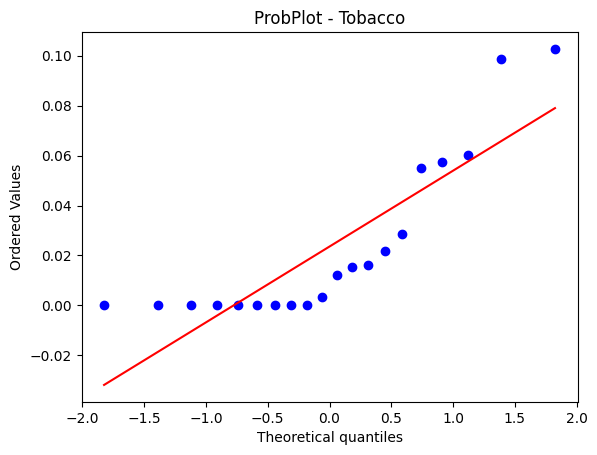

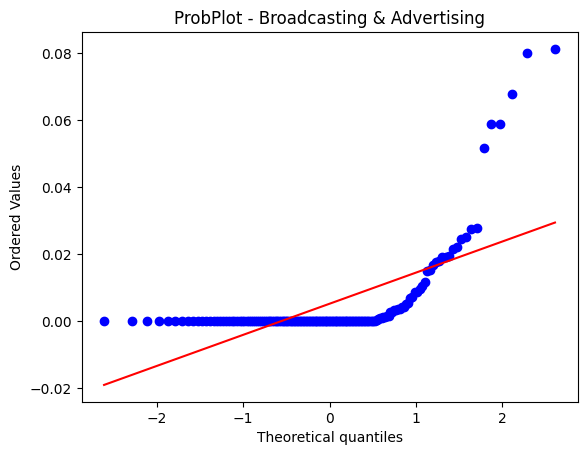

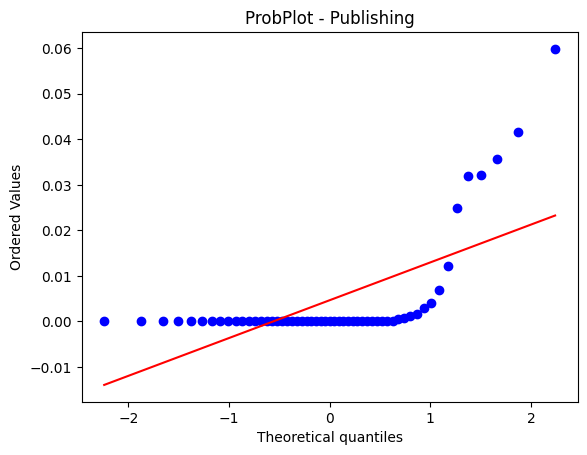

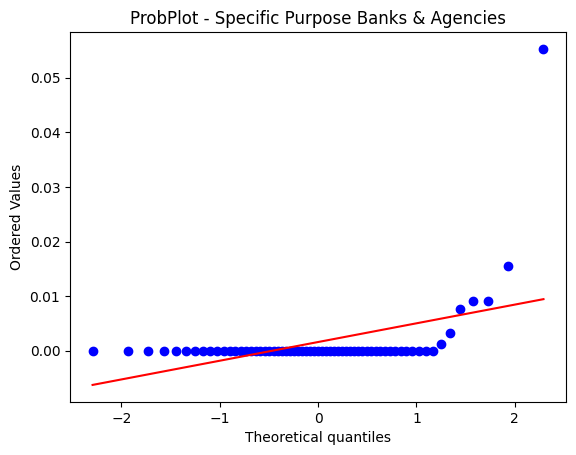

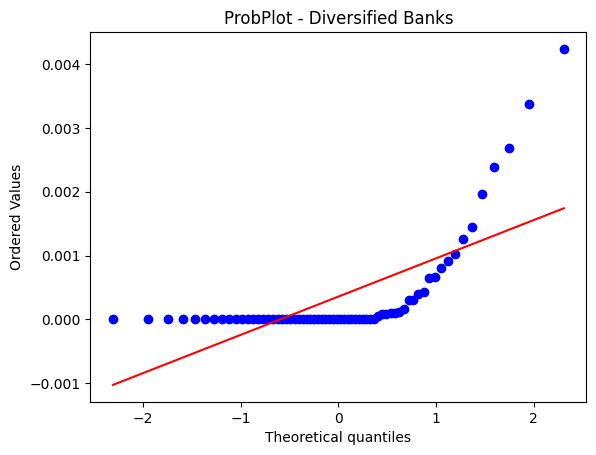

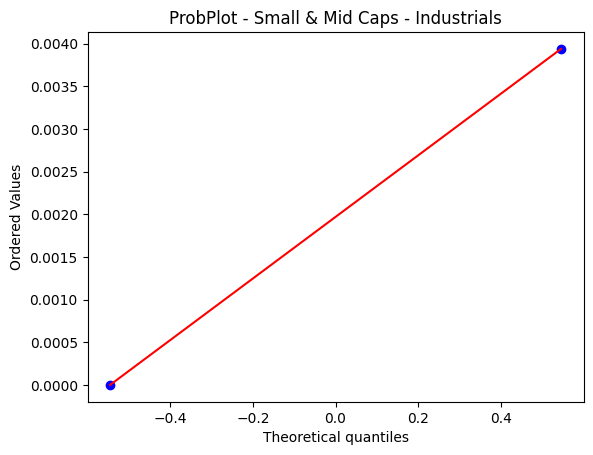

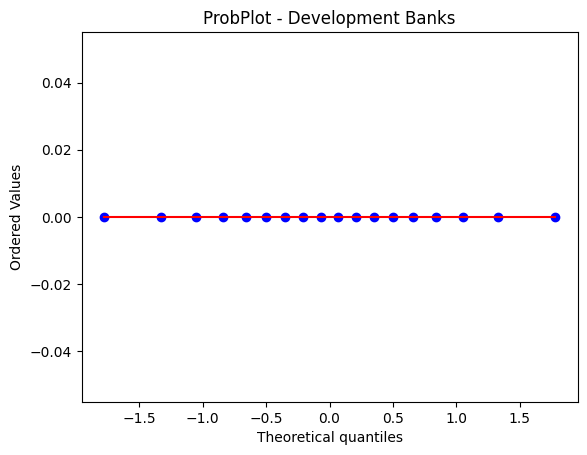

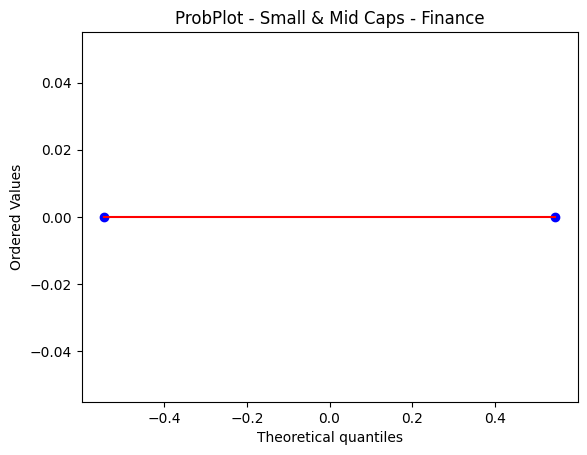

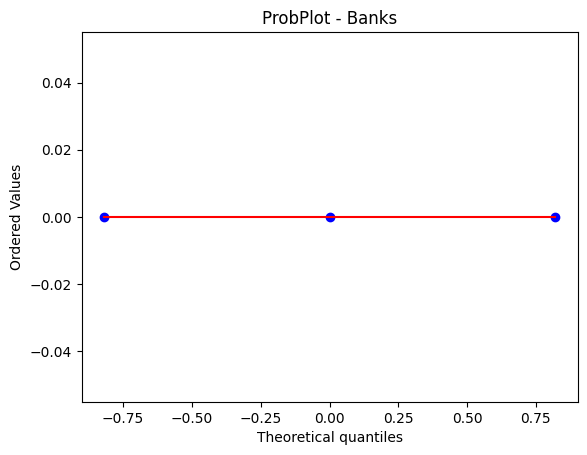

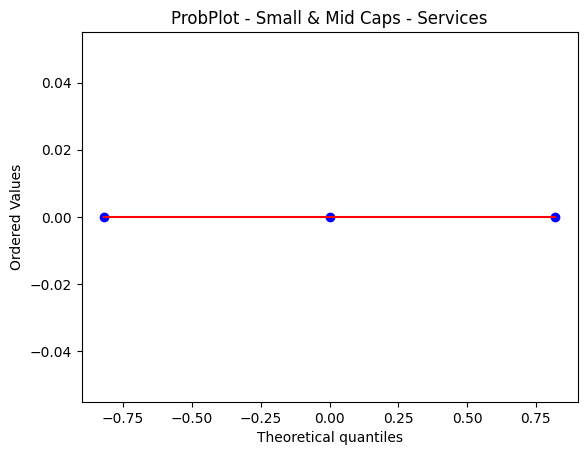

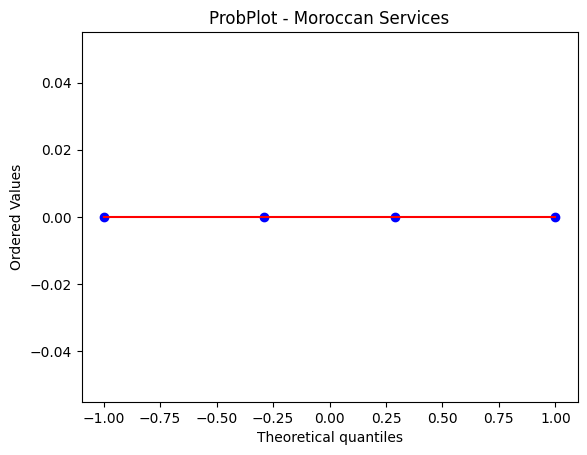

In [ ]:
import scipy.stats as stats

unique_sector = analysis_data["Generic Sector"].unique()
for sector in unique_sector:
  stats.probplot(analysis_data[analysis_data["Generic Sector"] == sector]["PAI7"], dist="norm", plot=plt)
  plt.title("ProbPlot - " + sector)
  plt.show()

In [ ]:
analysis_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9847 entries, 0 to 9846
Data columns (total 24 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   PAI7                                                     9847 non-null   float64
 1   Zone                                                     9847 non-null   object 
 2   Country                                                  9847 non-null   object 
 3   Generic Sector                                           9847 non-null   object 
 4   Reporting year                                           9847 non-null   int64  
 5   domesticSOE                                              9847 non-null   object 
 6   Infra / Non-Infra                                        9847 non-null   object 
 7   Region                                                   9847 non-null   object 
 8   rating_letter_category      

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoders = {}
for column in analysis_data:
  if analysis_data[column].dtype == object:
    encoder = LabelEncoder()
    analysis_data[column] = encoder.fit_transform(analysis_data[column])
    encoders[column] = encoder # .inverse_transform
analysis_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9847 entries, 0 to 9846
Data columns (total 24 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   PAI7                                                     9847 non-null   float64
 1   Zone                                                     9847 non-null   int64  
 2   Country                                                  9847 non-null   int64  
 3   Generic Sector                                           9847 non-null   int64  
 4   Reporting year                                           9847 non-null   int64  
 5   domesticSOE                                              9847 non-null   int64  
 6   Infra / Non-Infra                                        9847 non-null   int64  
 7   Region                                                   9847 non-null   int64  
 8   rating_letter_category      

In [ ]:
analysis_filled_data = analysis_data.fillna(value=0)
analysis_filled_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9847 entries, 0 to 9846
Data columns (total 24 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   PAI7                                                     9847 non-null   float64
 1   Zone                                                     9847 non-null   int64  
 2   Country                                                  9847 non-null   int64  
 3   Generic Sector                                           9847 non-null   int64  
 4   Reporting year                                           9847 non-null   int64  
 5   domesticSOE                                              9847 non-null   int64  
 6   Infra / Non-Infra                                        9847 non-null   int64  
 7   Region                                                   9847 non-null   int64  
 8   rating_letter_category      

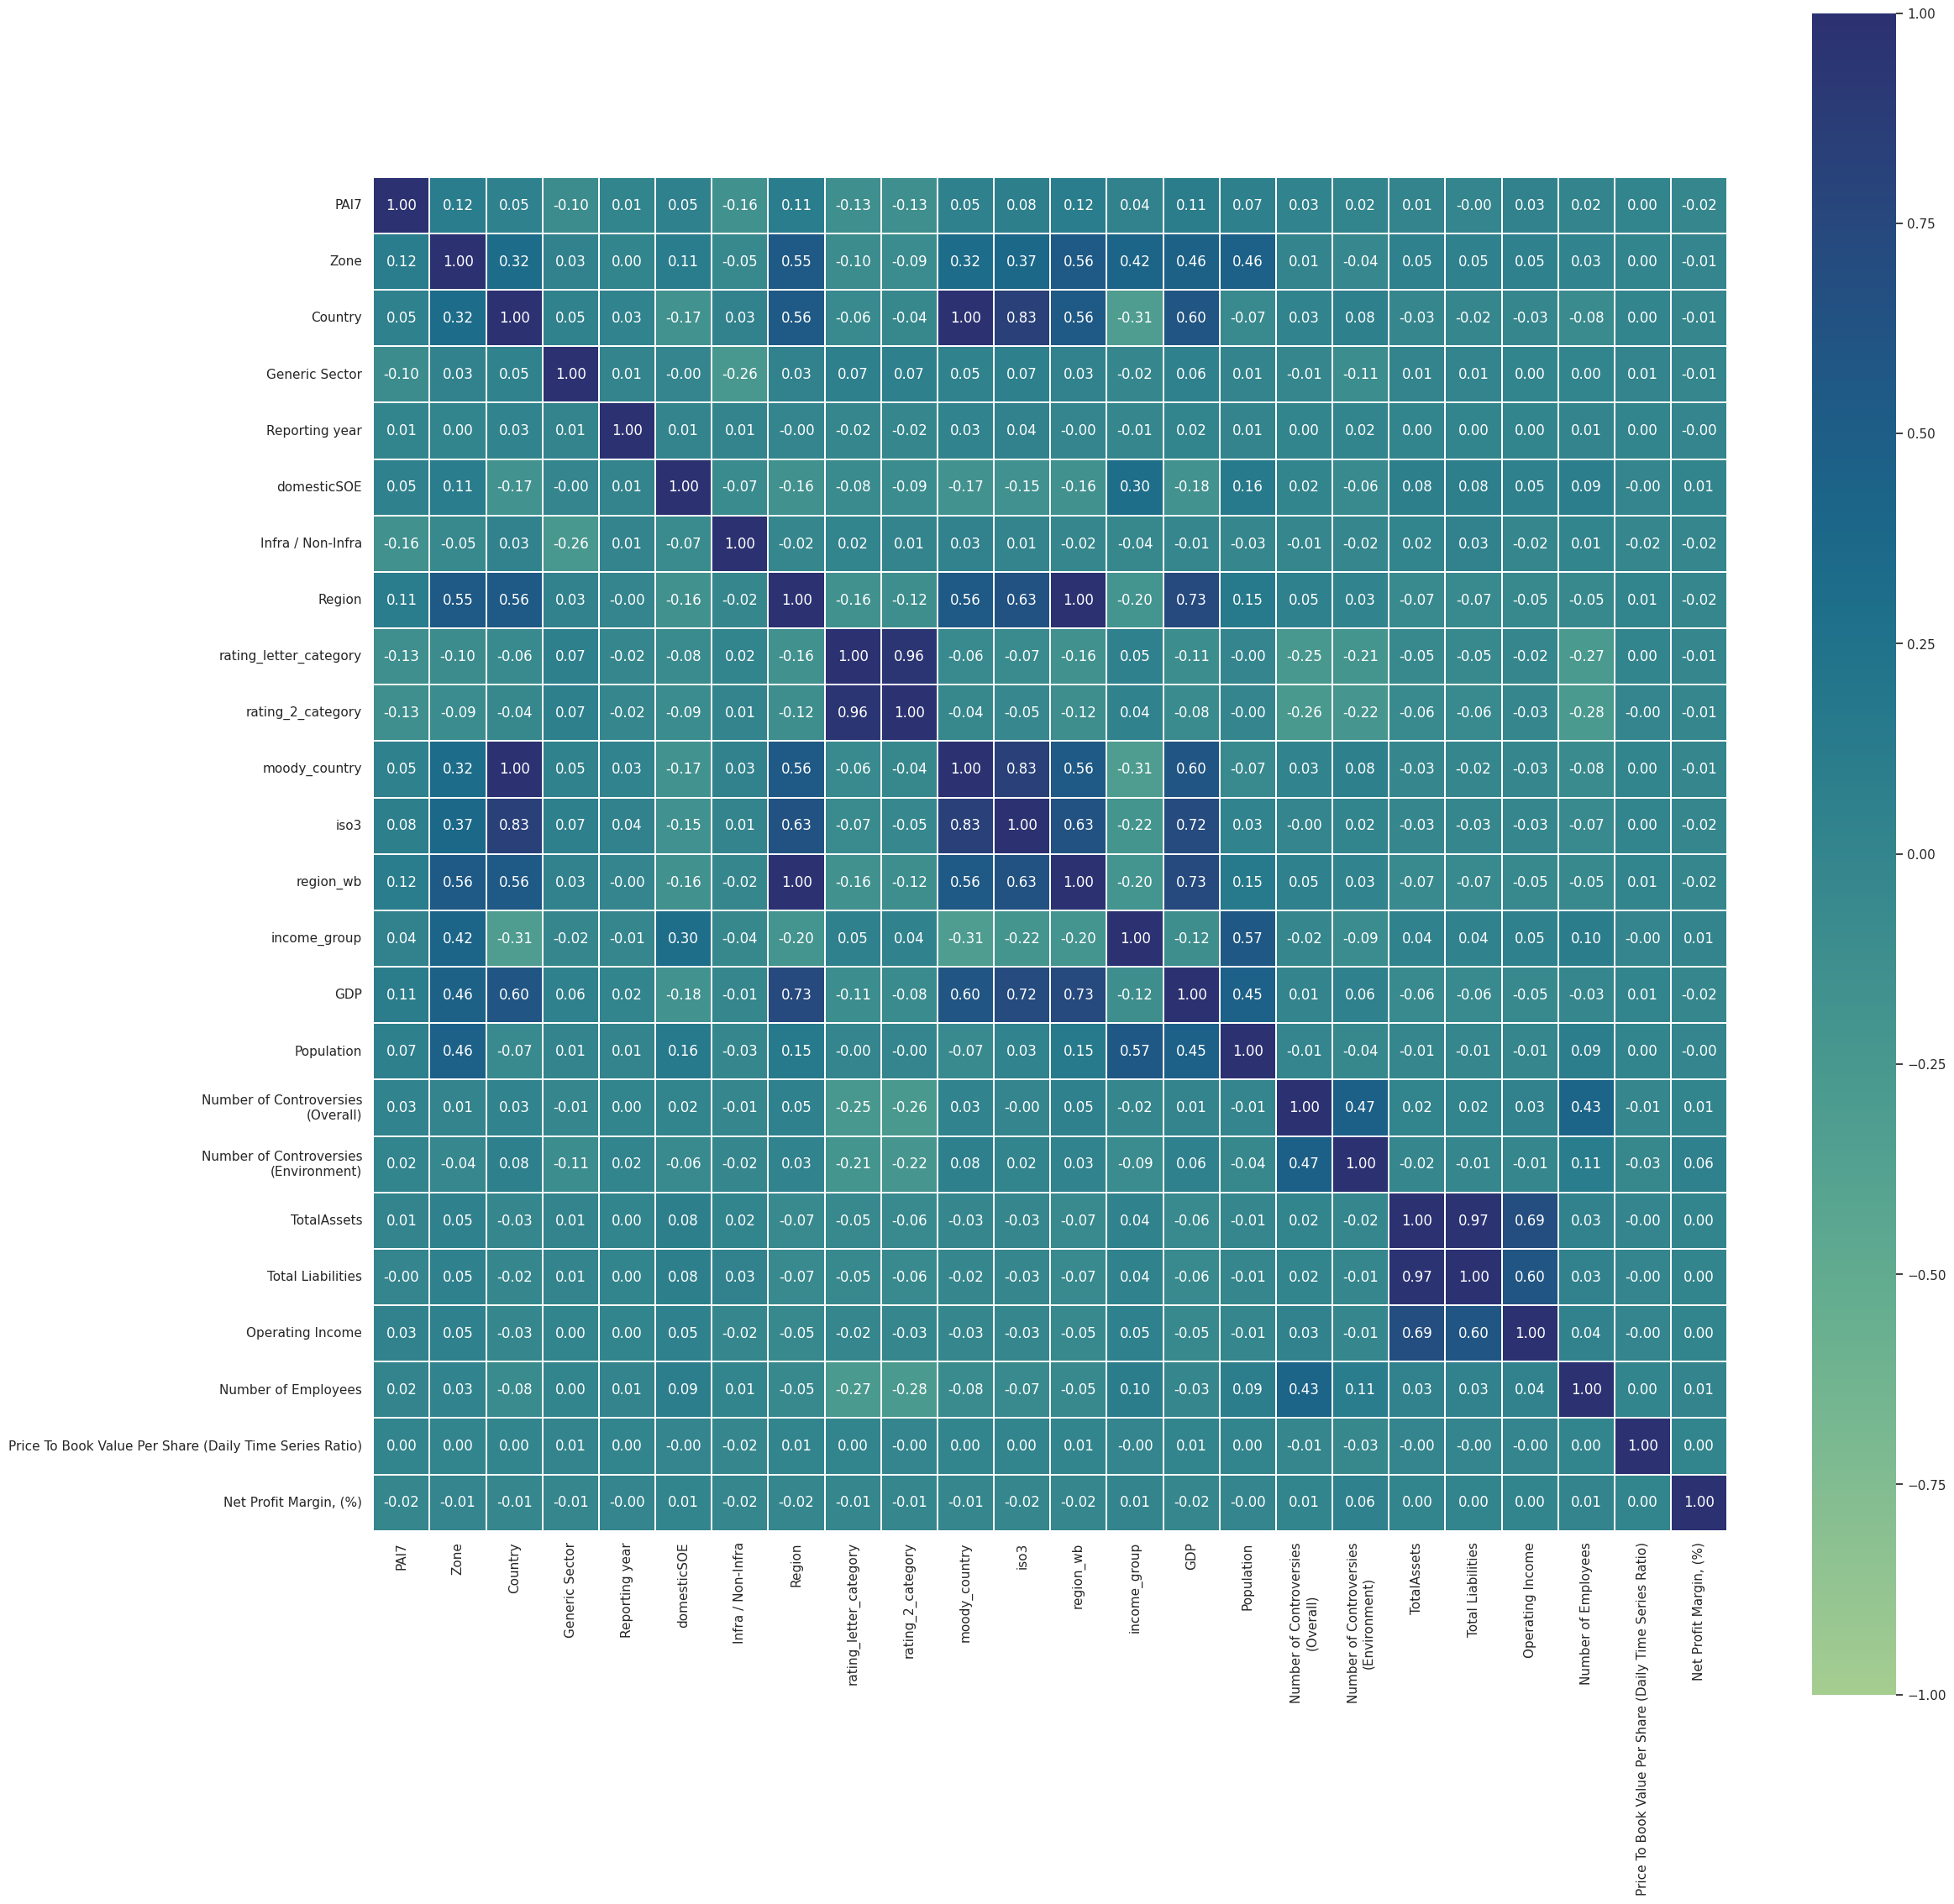

In [ ]:
sns.set(rc={"figure.figsize":(26,26)})
sns.heatmap(analysis_data.corr(), vmin=-1, vmax=1, square=True, annot=True, fmt=".2f", linewidths=0.2, cmap="crest");

In [ ]:
analysis_data_core = analysis_data[
  [
    "PAI7",
    "Country",
    "Generic Sector",
    "domesticSOE",
    "Infra / Non-Infra",
    "region_wb",
    "income_group",
    "rating_letter_category",
    "rating_2_category",
    "Number of Controversies\n(Overall)",
    "Number of Controversies\n(Environment)"
  ]
]

In [ ]:
analysis_filled_data_core = analysis_data_core.fillna(value=0)
analysis_filled_data_core.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9847 entries, 0 to 9846
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   PAI7                                   9847 non-null   float64
 1   Country                                9847 non-null   int64  
 2   Generic Sector                         9847 non-null   int64  
 3   domesticSOE                            9847 non-null   int64  
 4   Infra / Non-Infra                      9847 non-null   int64  
 5   region_wb                              9847 non-null   int64  
 6   income_group                           9847 non-null   int64  
 7   rating_letter_category                 9847 non-null   int64  
 8   rating_2_category                      9847 non-null   int64  
 9   Number of Controversies
(Overall)      9847 non-null   float64
 10  Number of Controversies
(Environment)  9847 non-null   float64
dtypes: f

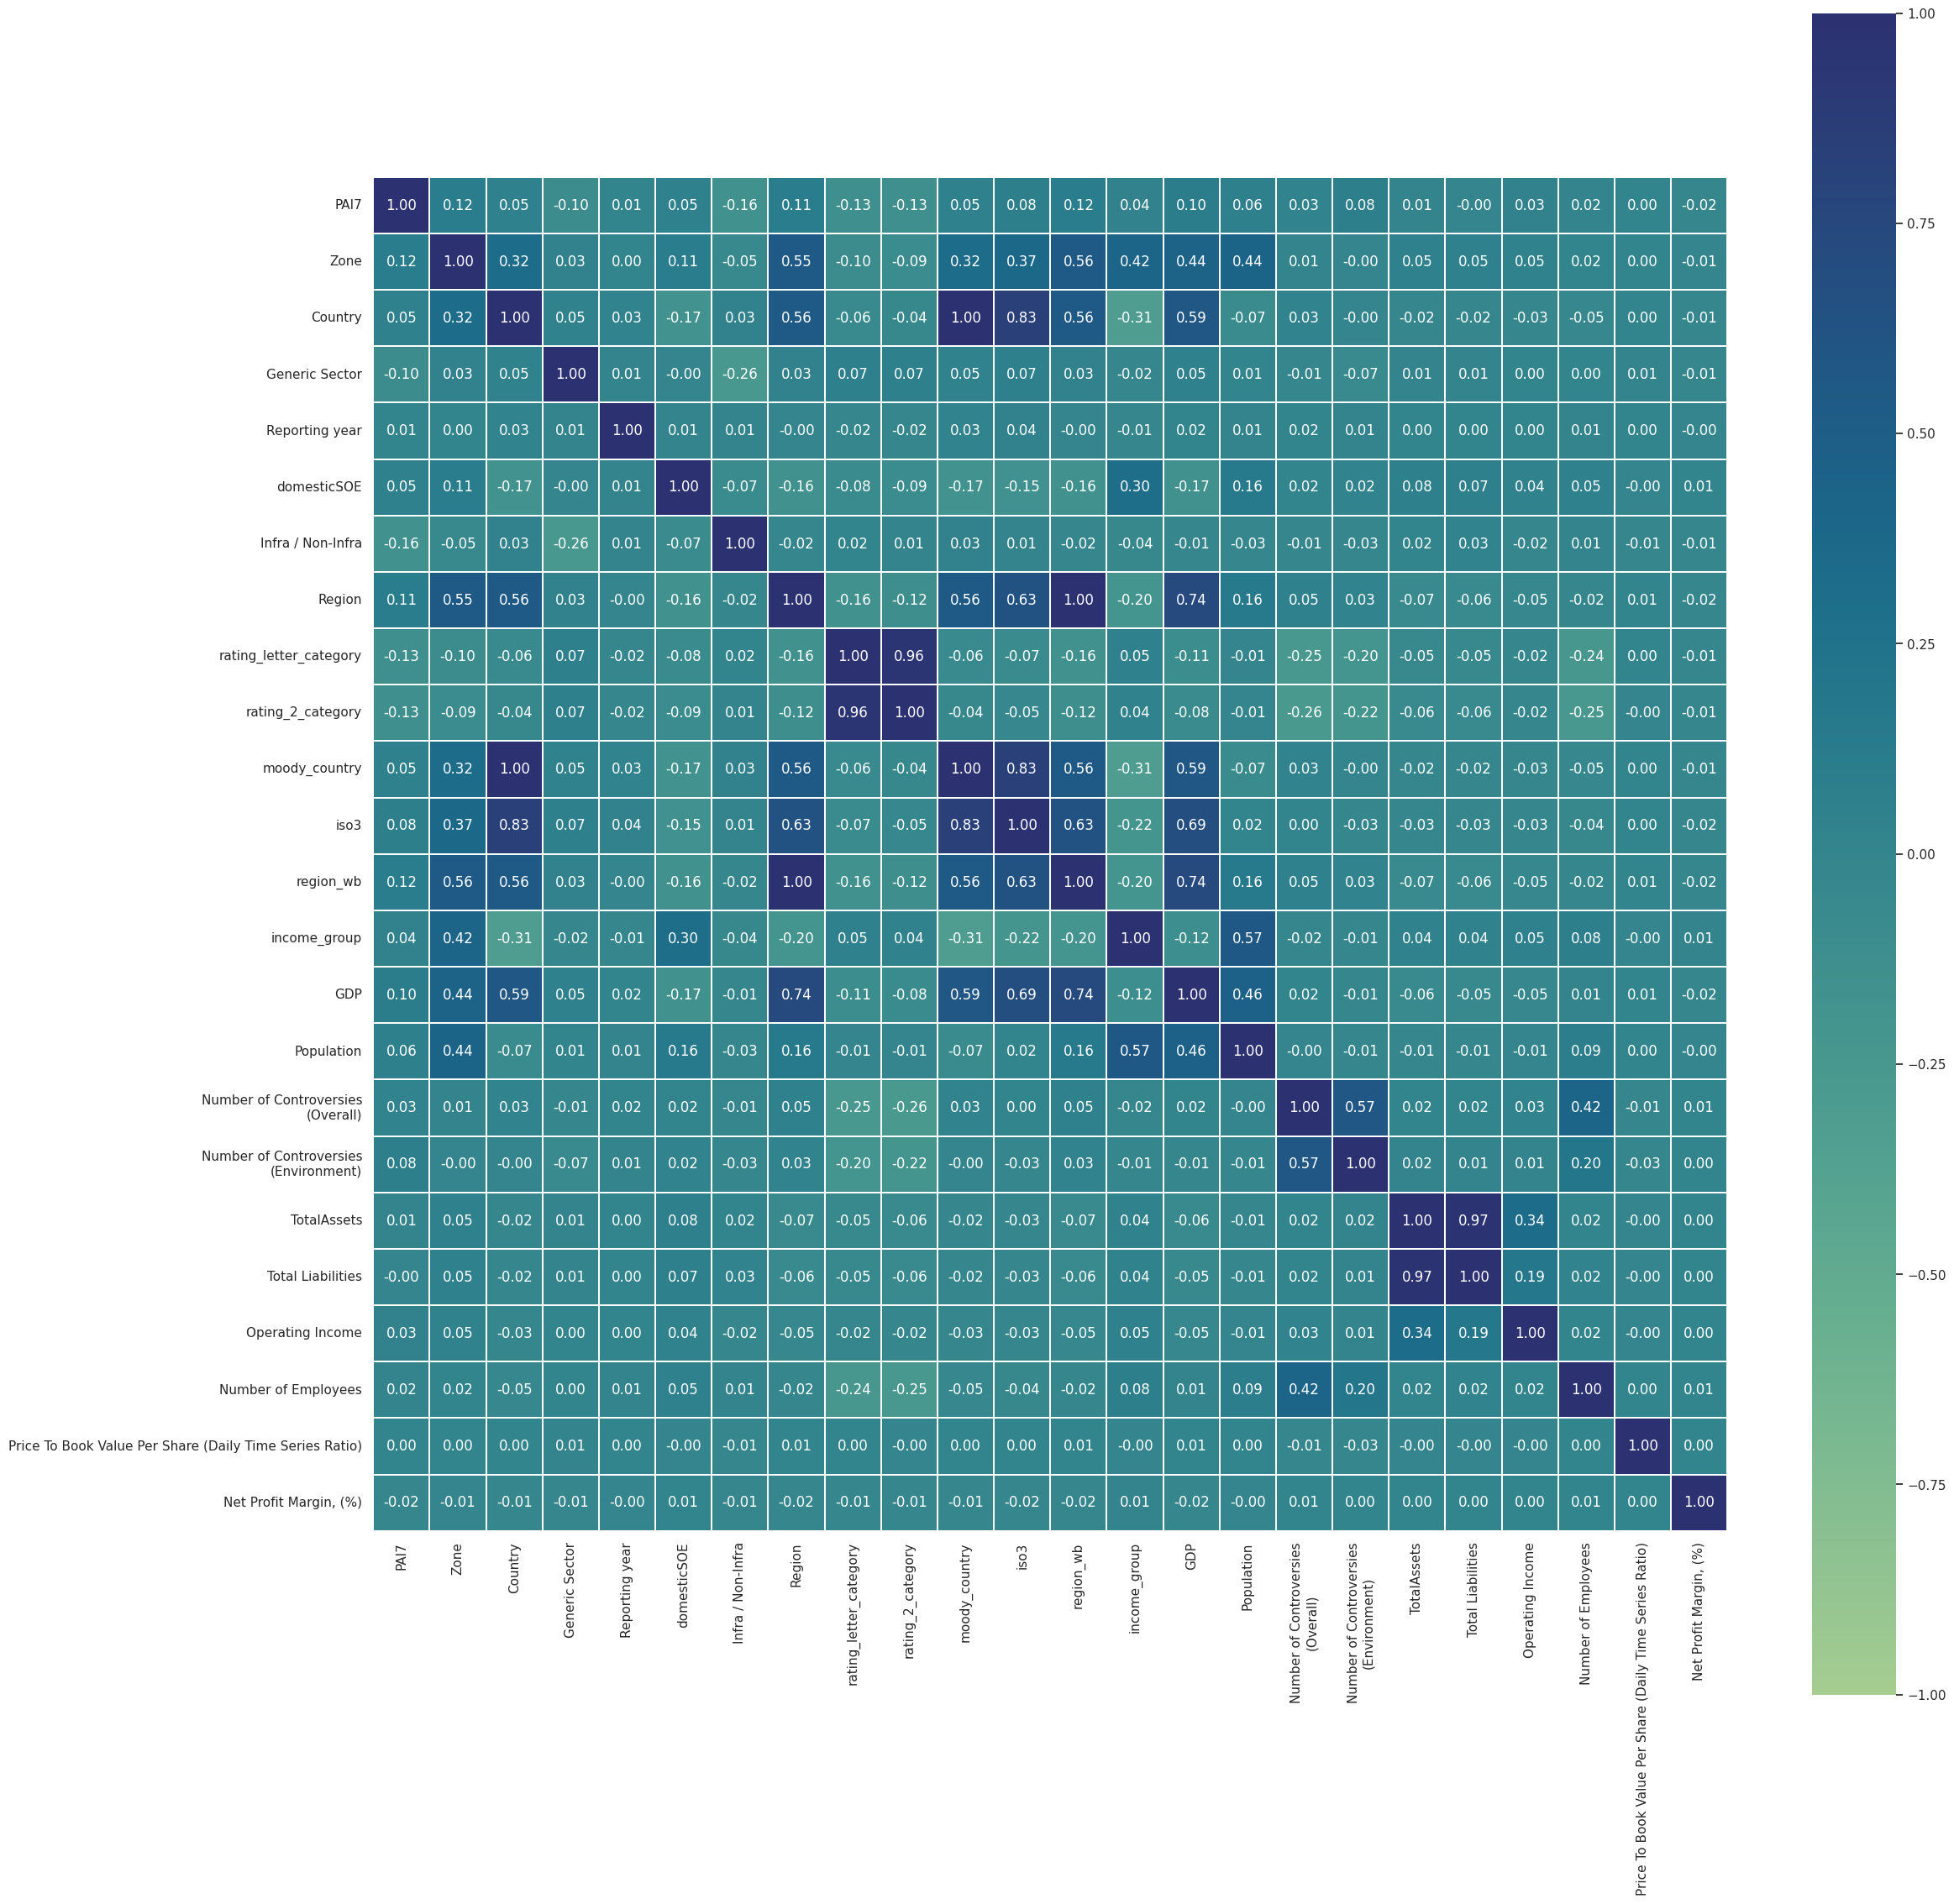

In [ ]:
sns.heatmap(analysis_filled_data.corr(), vmin=-1, vmax=1, square=True, annot=True, fmt=".2f", linewidths=0.2, cmap="crest");

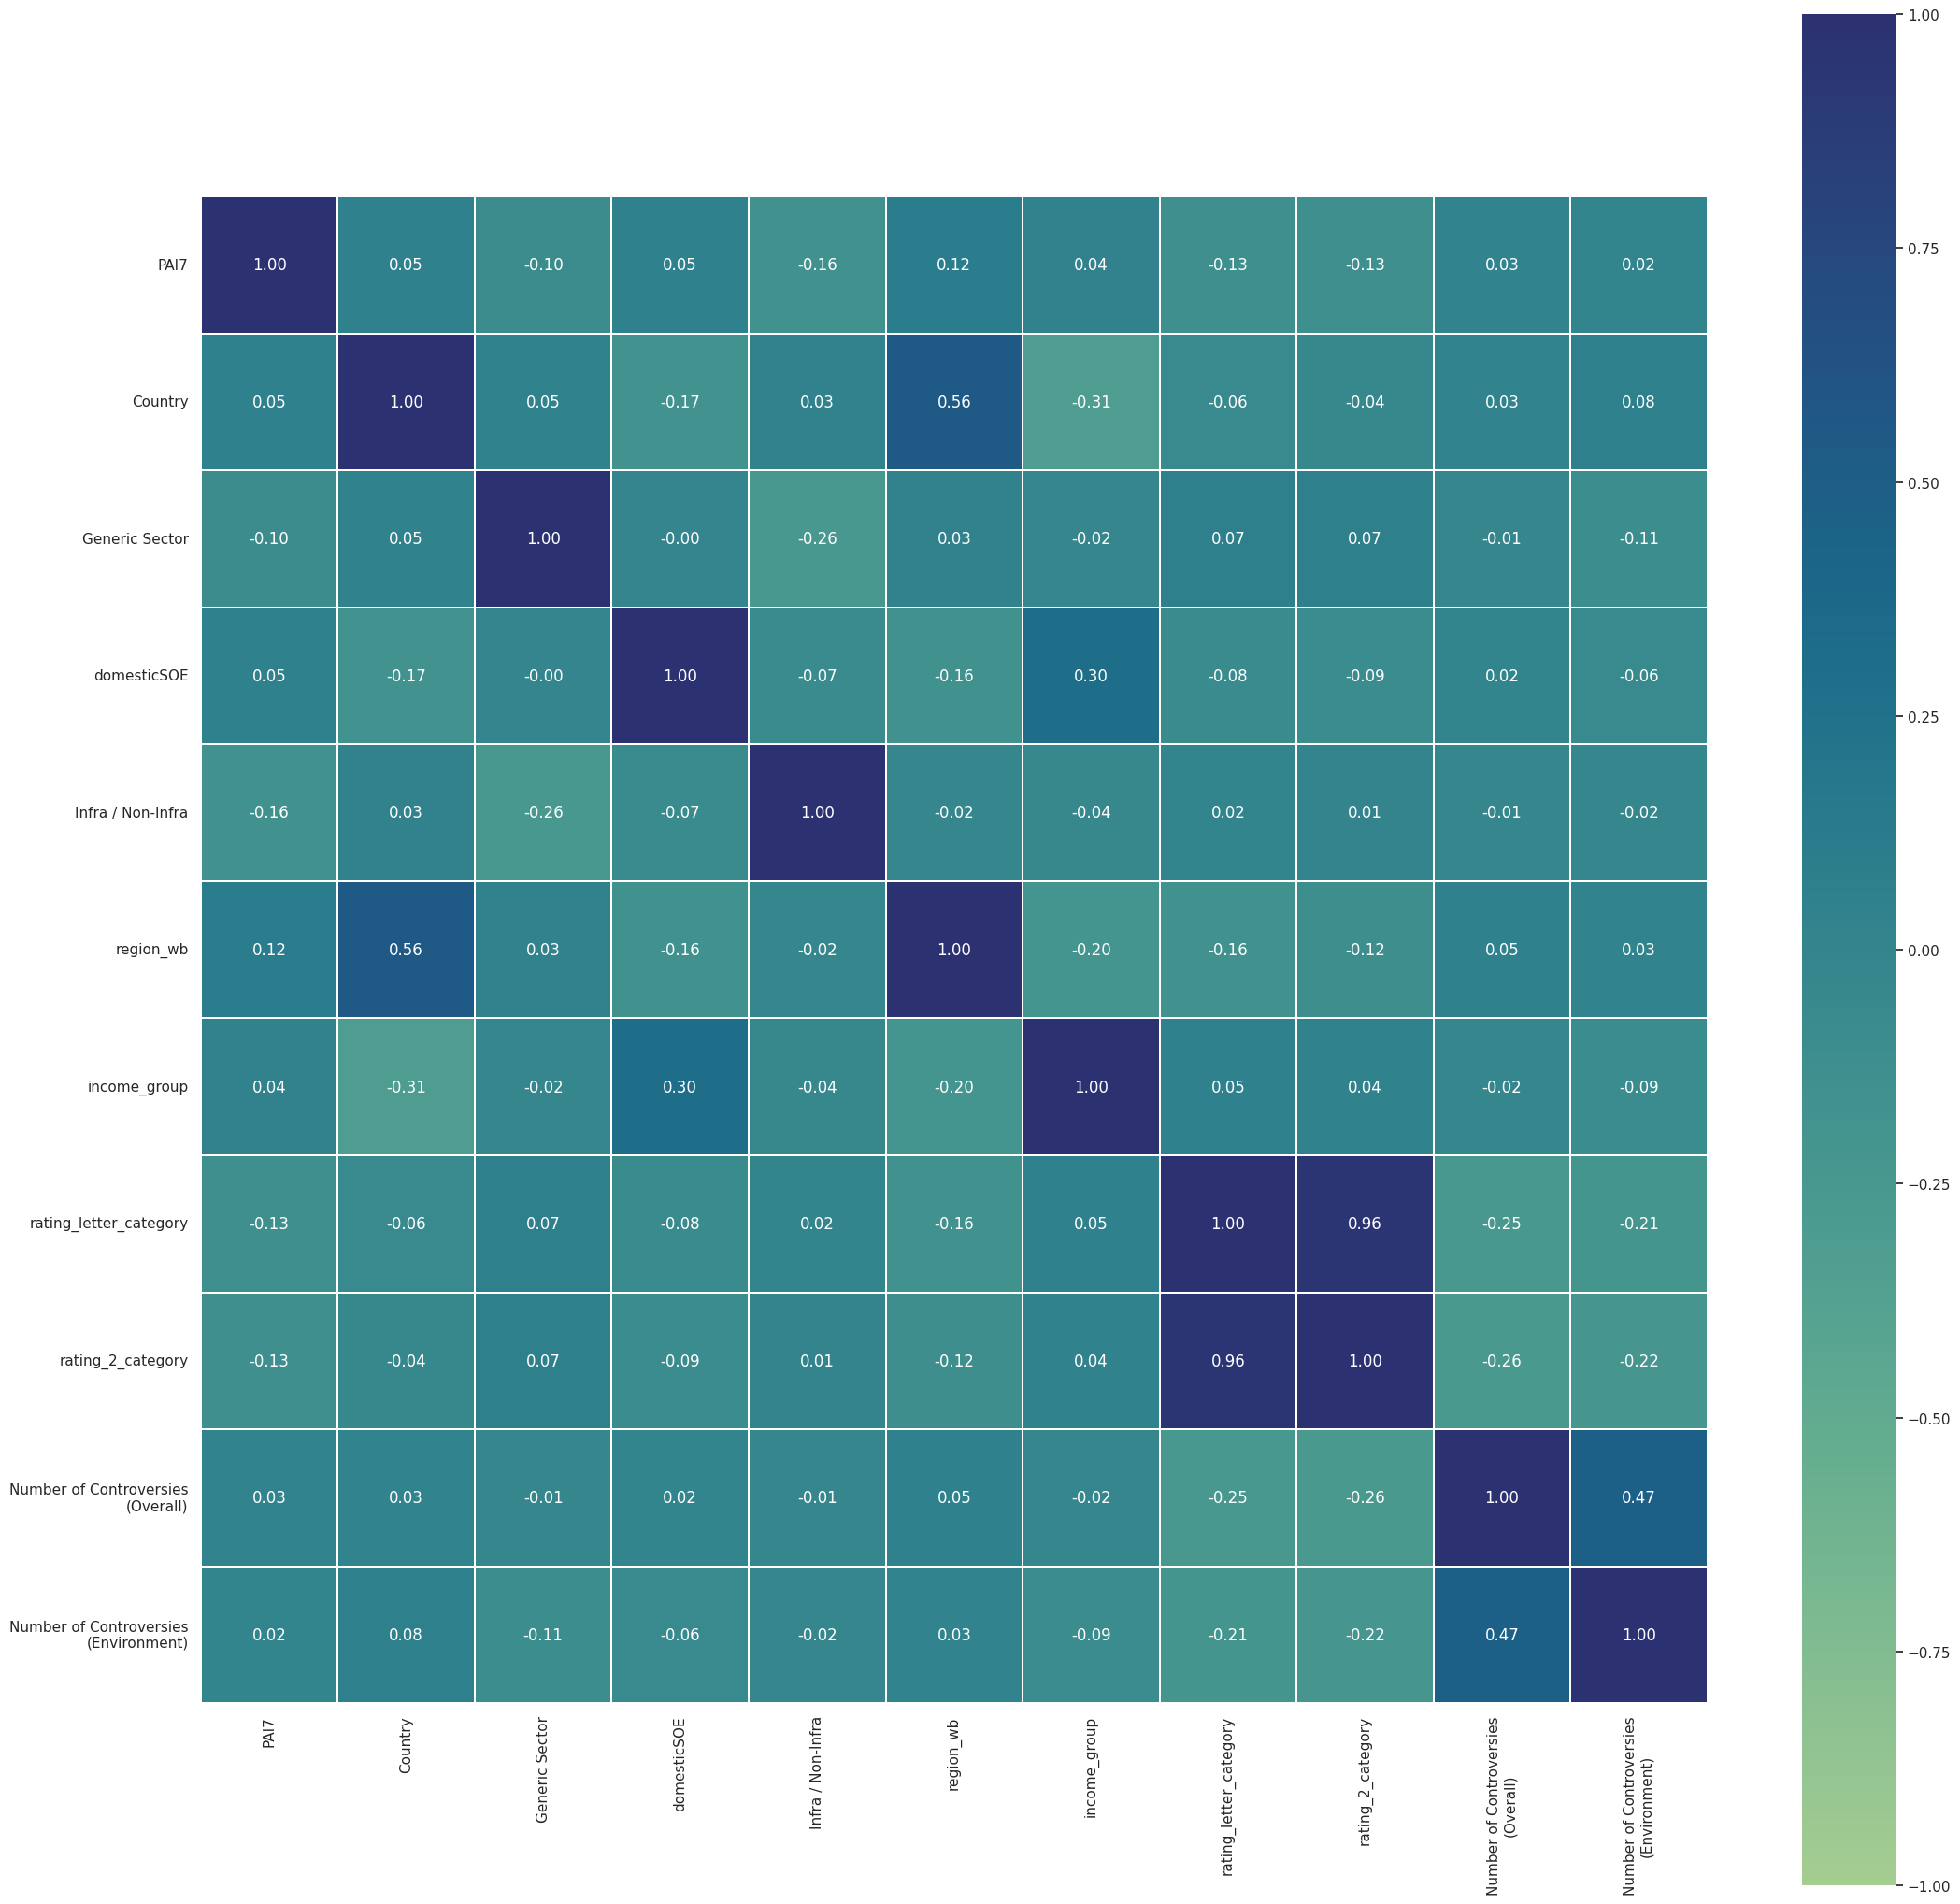

In [ ]:
sns.heatmap(analysis_data_core.corr(), vmin=-1, vmax=1, square=True, annot=True, fmt=".2f", linewidths=0.2, cmap="crest");

In [ ]:
import scipy

group_data = analysis_filled_data.groupby(by=["Generic Sector", "domesticSOE"])[["PAI7"]]
keys = analysis_filled_data.groupby(by=["Generic Sector", "domesticSOE"])[["PAI7"]].groups.keys()
group_data_ext = tuple([group_data.get_group(key).values for key in keys])

scipy.stats.f_oneway(*group_data_ext)

F_onewayResult(statistic=array([24.13350098]), pvalue=array([0.]))

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = analysis_data.columns
vif_data["variance inflation factor"] = [np.round(variance_inflation_factor(analysis_filled_data.values, i), 2) for i in range(len(analysis_data.columns))]

vif_data

feature  \
0                                                PAI7   
1                                                Zone   
2                                             Country   
3                                      Generic Sector   
4                                      Reporting year   
5                                         domesticSOE   
6                                   Infra / Non-Infra   
7                                              Region   
8                              rating_letter_category   
9                                   rating_2_category   
10                                      moody_country   
11                                               iso3   
12                                          region_wb   
13                                       income_group   
14                                                GDP   
15                                         Population   
16                 Number of Controversies\n(Overall)   
17             Number of Controversies\n(Environment)   
18                                        TotalAssets   
19                                  Total Liabilities   
20                                   Operating Income   
21                                Number of Employees   
22  Price To Book Value Per Share (Daily Time Seri...   
23                             Net Profit Margin, (%)   

    variance inflation factor  
0                1.090000e+00  
1                2.770000e+00  
2                4.952308e+09  
3                1.100000e+00  
4                0.000000e+00  
5                1.170000e+00  
6                1.090000e+00  
7                1.262900e+03  
8                1.183000e+01  
9                1.187000e+01  
10               1.332663e+08  
11               4.620000e+00  
12               1.268080e+03  
13               2.920000e+00  
14               5.580000e+00  
15               3.460000e+00  
16               1.770000e+00  
17               1.520000e+00  
18               3.053000e+01  
19               2.810000e+01  
20               1.830000e+00  
21               1.280000e+00  
22               1.000000e+00  
23               1.000000e+00

In [ ]:
corr_threshold = 0.10
var_threshold  = 10
corr_data = np.fabs(analysis_data.corr()[["PAI7"]]) > corr_threshold
corr_data["vif"] = vif_data["variance inflation factor"].values
corr_data = corr_data.drop(index="PAI7", axis=0)
unfiltered_cols = corr_data.index
filtered_cols = corr_data[(corr_data["PAI7"]) & (corr_data["vif"] < var_threshold)].index
filtered_cols

Index(['Zone', 'Infra / Non-Infra', 'GDP'], dtype='object')

In [ ]:
filtered_cols = list(set(unfiltered_cols) - set(filtered_cols))

In [ ]:
from sklearn.linear_model import LinearRegression

X,y = analysis_filled_data[unfiltered_cols], analysis_filled_data[pred_col]
lin_reg = LinearRegression()
lin_reg.fit(X, y)

lin_reg.score(X, y)

0.11984943928771208

In [ ]:
X,y = analysis_filled_data[filtered_cols], analysis_filled_data[pred_col]
lin_reg = LinearRegression()
lin_reg.fit(X, y)

lin_reg.score(X, y)

0.08790511268297452

In [ ]:
import xgboost as xgb
from sklearn.model_selection import KFold

X,y = analysis_filled_data[unfiltered_cols], analysis_filled_data[pred_col]
agg_scores = []

kf = KFold(n_splits=5, shuffle=True)
for i, (train_index, test_index) in enumerate(kf.split(X)):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y[train_index], y[test_index]
  xgb_reg = xgb.XGBRegressor()
  xgb_reg.fit(X_train, y_train)
  score = xgb_reg.score(X, y)
  agg_scores.append(score)
  print("Folded Result:", score)
print("Average Score:", np.mean(agg_scores), np.var(agg_scores))

Folded Result: 0.7027156450195848
Folded Result: 0.7055672868593149
Folded Result: 0.6890831732973579
Folded Result: 0.7335759878995292
Folded Result: 0.7419329663242077
Average Score: 0.7145750118799988 0.0003962224575535469


In [ ]:
import xgboost as xgb
from sklearn.model_selection import KFold

X,y = analysis_filled_data[filtered_cols], analysis_filled_data[pred_col]
agg_scores = []

kf = KFold(n_splits=5, shuffle=True)
for i, (train_index, test_index) in enumerate(kf.split(X)):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y[train_index], y[test_index]
  xgb_reg = xgb.XGBRegressor()
  xgb_reg.fit(X_train, y_train)
  score = xgb_reg.score(X, y)
  agg_scores.append(score)
  print("Folded Result:", score)
print("Average Score:", np.mean(agg_scores), np.var(agg_scores))

Folded Result: 0.6660812260635207
Folded Result: 0.67670496774328
Folded Result: 0.7405063779195074
Folded Result: 0.6939504459010233
Folded Result: 0.7329369461649268
Average Score: 0.7020359927584516 0.000886924320051791


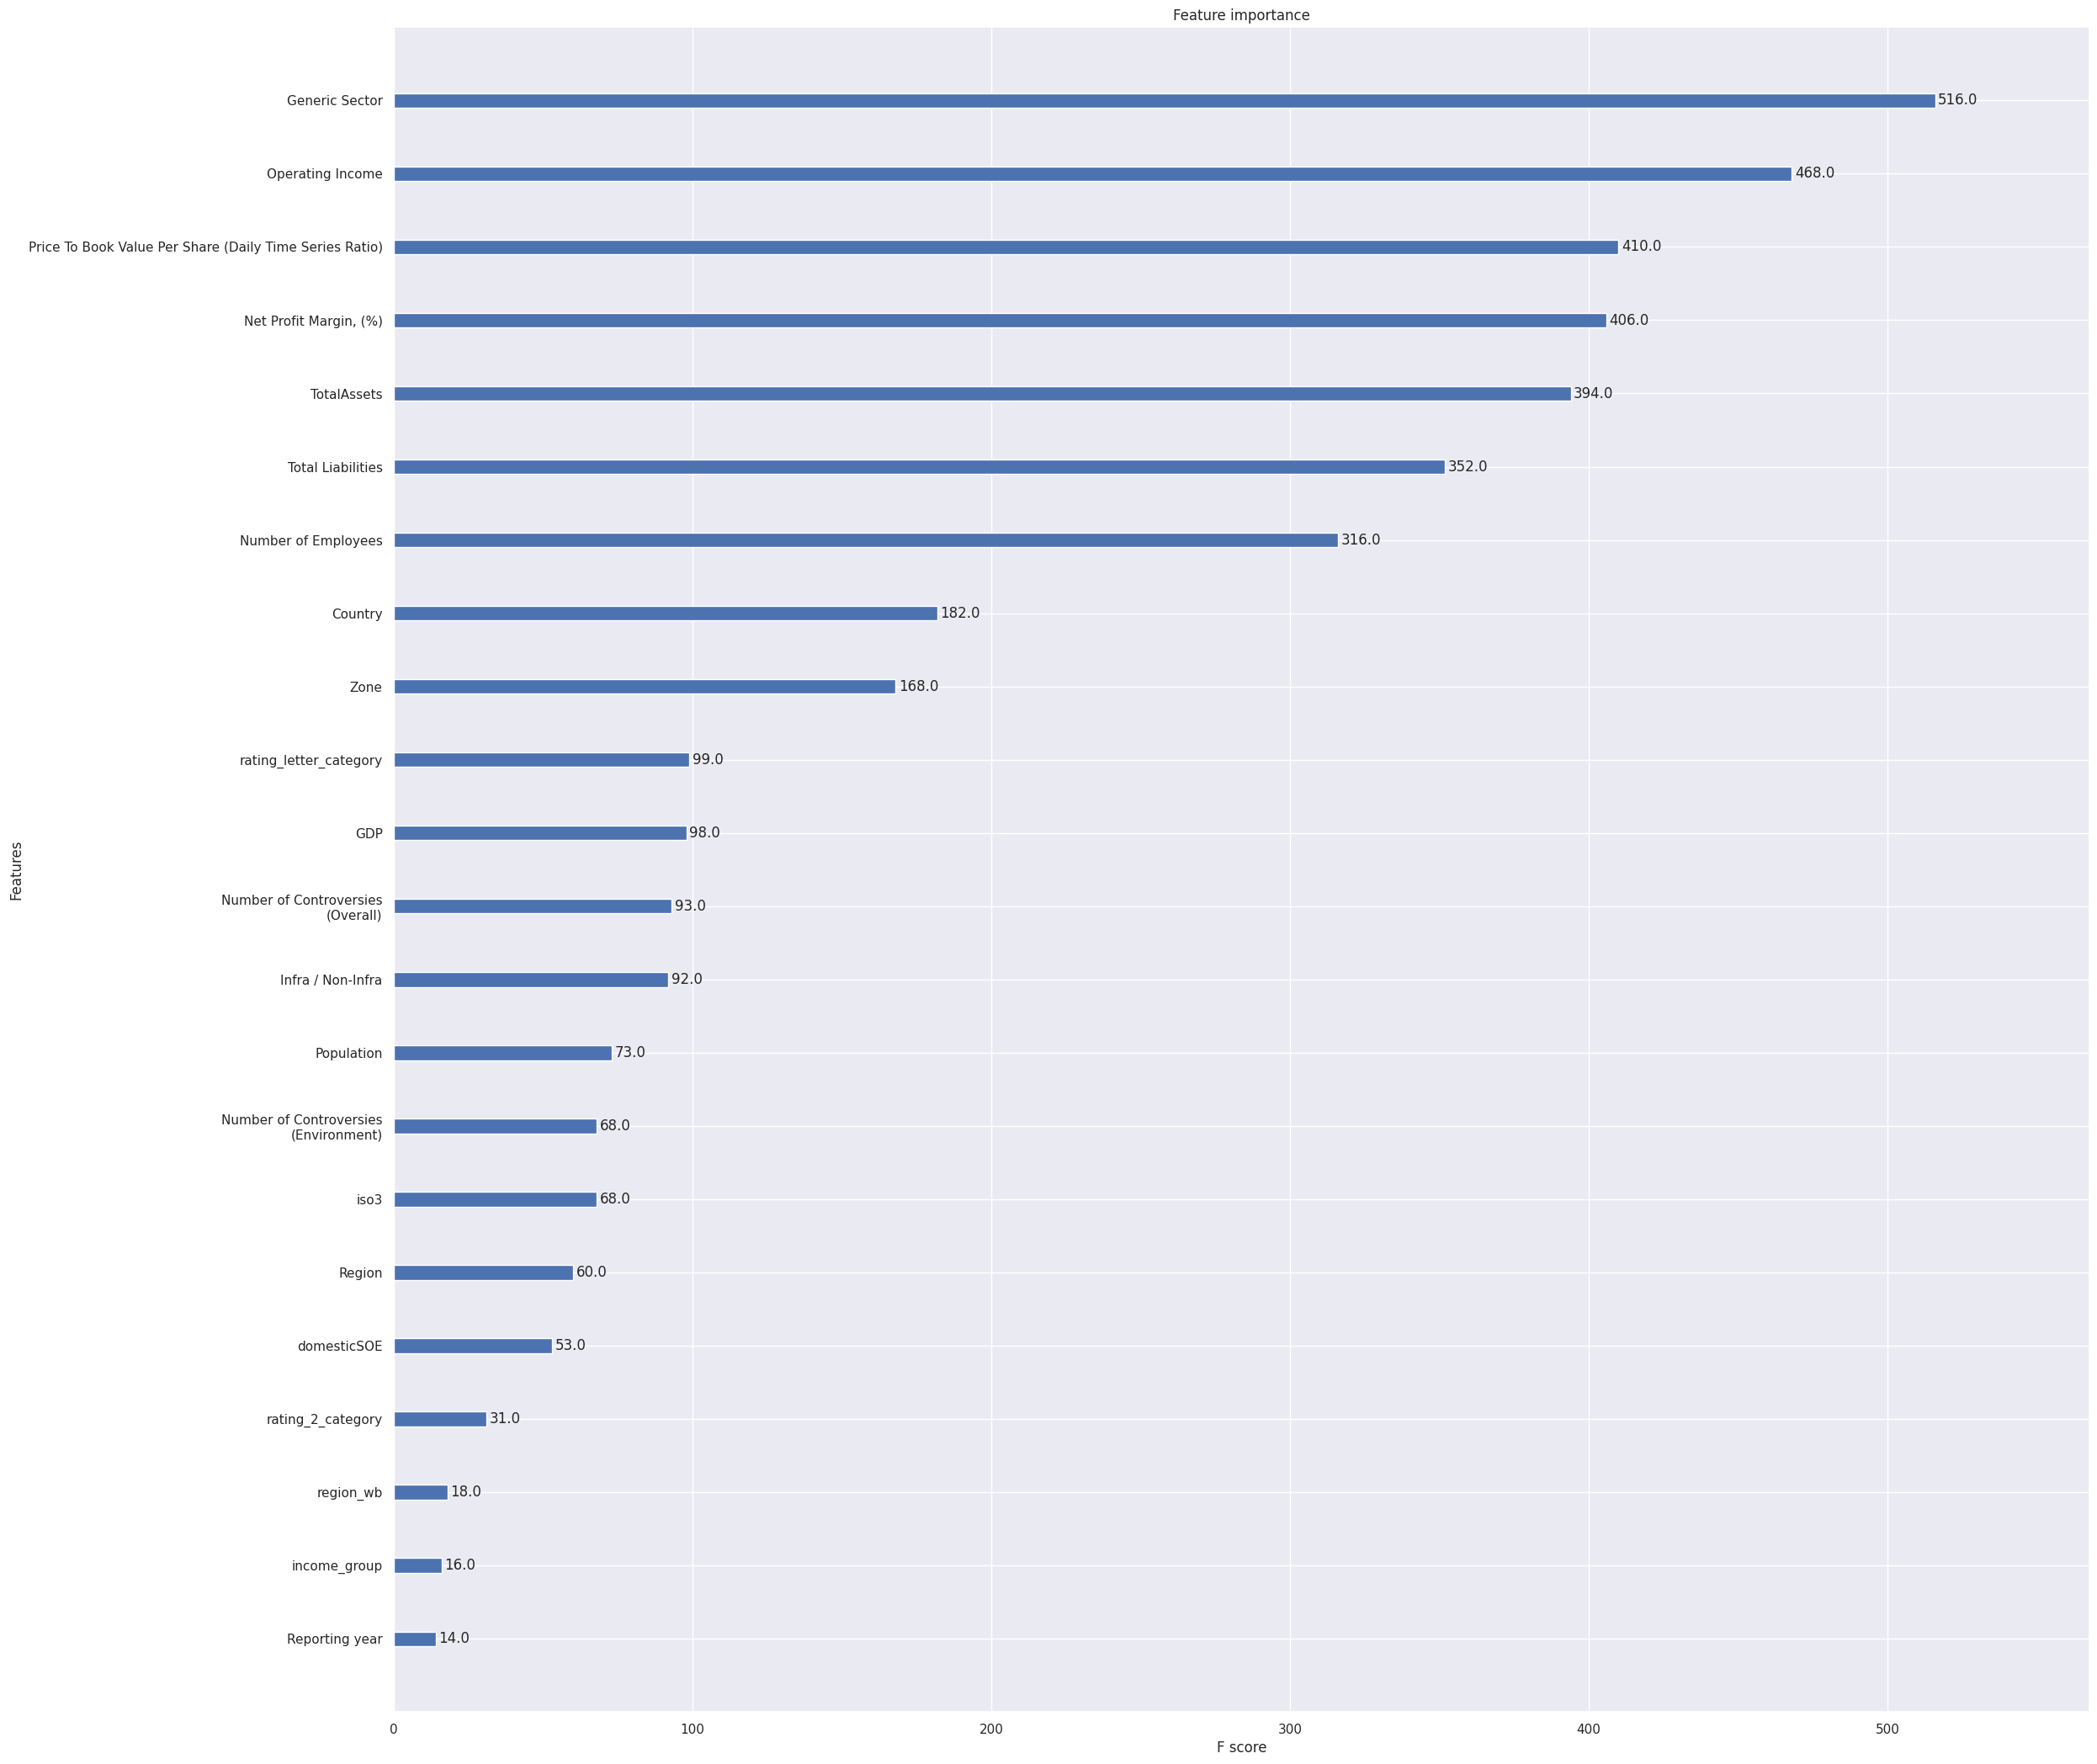

In [ ]:
from xgboost import plot_importance

xgb_refit = xgb.XGBRegressor()
xgb_refit.fit(X,y)

plot_importance(xgb_reg);

In [ ]:
grouped_soe = analysis_filled_data.groupby(by=["Generic Sector", "domesticSOE"])[["PAI7"]].mean()
sector_level = encoders["Generic Sector"].inverse_transform(grouped_soe.index.get_level_values(0))
soe_level = encoders["domesticSOE"].inverse_transform(grouped_soe.index.get_level_values(1))

multi_index = []
for sector in np.unique(sector_level):
  for soe in np.unique(soe_level):
    multi_index.append((sector, soe))
multi_index = pd.MultiIndex.from_tuples(multi_index, names=["Generic Sector", "domesticSOE"])

In [ ]:
nlp_data_overview = pd.read_excel("nlp/Controversies.xlsx", sheet_name=1)
nlp_data_overview

Last Update\n(Overall)                           Title     Vigeo Key  \
0                 2023/05/26  Commonwealth Bank of Australia  AU000000CBA7   
1                 2023/05/26                       Tesco Plc  GB0008847096   
2                 2023/05/26                        Syngenta  CH0011037469   
3                 2023/05/26           Imperial Metals Corp.  CA4528921022   
4                 2023/05/26                      Renault SA  FR0000131906   
...                      ...                             ...           ...   
12016             2014/10/13                  Nichirei Corp.  JP3665200006   
12017             2014/10/13       Nisshin Seifun Group Inc.  JP3676800000   
12018             2014/10/13                   NH Foods Ltd.  JP3743000006   
12019                    NaN                      Neoenergia  BRGNANACNOR8   
12020                    NaN                 Grupo Boticario  VIGEIRIS0388   

               ISIN             Area         Country  \
0      AU000000CBA7     Asia Pacific       Australia   
1      GB00BLGZ9862           Europe  United Kingdom   
2      XS1199954691           Europe     Switzerland   
3      CA4528921022    North America          Canada   
4      FR0000131906           Europe          France   
...             ...              ...             ...   
12016  JP3665200006     Asia Pacific           Japan   
12017  JP3676800000     Asia Pacific           Japan   
12018  JP3743000006     Asia Pacific           Japan   
12019  BRNEOEACNOR3  Emerging Market          Brazil   
12020  VIGEIRIS0388  Emerging Market          Brazil   

                         Sector                            Sector by Area  \
0             Diversified Banks            Diversified Banks Asia Pacific   
1                  Supermarkets                              Supermarkets   
2                     Chemicals                                 Chemicals   
3               Mining & Metals             Mining & Metals North America   
4                   Automobiles                               Automobiles   
...                         ...                                       ...   
12016                      Food                         Food Asia Pacific   
12017                      Food                         Food Asia Pacific   
12018                      Food                         Food Asia Pacific   
12019  Electric & Gas Utilities  Electric & Gas Utilities Emerging Market   
12020  Luxury Goods & Cosmetics  Luxury Goods & Cosmetics Emerging Market   

       Number of Controversies\n(Overall)  \
0                                    18.0   
1                                    28.0   
2                                     7.0   
3                                     2.0   
4                                     7.0   
...                                   ...   
12016                                 0.0   
12017                                 0.0   
12018                                 0.0   
12019                                 NaN   
12020                                 NaN   

       Number of Controversies\nof High or Critical Severity\n(Overall)  ...  \
0                                                    6.0                 ...   
1                                                    8.0                 ...   
2                                                    3.0                 ...   
3                                                    1.0                 ...   
4                                                    3.0                 ...   
...                                                  ...                 ...   
12016                                                0.0                 ...   
12017                                                0.0                 ...   
12018                                                0.0                 ...   
12019                                                NaN                 ...   
12020                                             

In [ ]:
nlp_data_details = pd.read_excel("nlp/Controversies.xlsx", sheet_name=2)
nlp_data_details

Controversy\nUpdates                           Title     Vigeo Key  \
0               2023/05/26  Commonwealth Bank of Australia  AU000000CBA7   
1               2023/04/06  Commonwealth Bank of Australia  AU000000CBA7   
2               2023/04/17  Commonwealth Bank of Australia  AU000000CBA7   
3               2023/03/30  Commonwealth Bank of Australia  AU000000CBA7   
4               2023/02/17  Commonwealth Bank of Australia  AU000000CBA7   
...                    ...                             ...           ...   
45063           2015/05/11               NH Hotel Group SA  ES0161560018   
45064           2015/01/09                             NOK  JP3164800009   
45065           2014/12/17                Halcon Resources  US40537QAD25   
45066           2014/11/04                    Alliander NV  XS0558238043   
45067           2014/10/17                  KWS SAAT (XET)  DE0007074007   

               ISIN           Area                   Country  \
0      AU000000CBA7   Asia Pacific                 Australia   
1      AU000000CBA7   Asia Pacific                 Australia   
2      AU000000CBA7   Asia Pacific                 Australia   
3      AU000000CBA7   Asia Pacific                 Australia   
4      AU000000CBA7   Asia Pacific                 Australia   
...             ...            ...                       ...   
45063  ES0161560018         Europe                     Spain   
45064  JP3164800009   Asia Pacific                     Japan   
45065  US07134L1070  North America  United States of America   
45066  XS0558238043         Europe               Netherlands   
45067  DE0007074007         Europe                   Germany   

                                Sector  \
0                    Diversified Banks   
1                    Diversified Banks   
2                    Diversified Banks   
3                    Diversified Banks   
4                    Diversified Banks   
...                                ...   
45063  Hotel, Leisure Goods & Services   
45064      Industrial Goods & Services   
45065                           Energy   
45066         Electric & Gas Utilities   
45067                        Chemicals   

                                 Sector by Area  \
0                Diversified Banks Asia Pacific   
1                Diversified Banks Asia Pacific   
2                Diversified Banks Asia Pacific   
3                Diversified Banks Asia Pacific   
4                Diversified Banks Asia Pacific   
...                                         ...   
45063           Hotel, Leisure Goods & Services   
45064  Industrial Goods & Services Asia Pacific   
45065                      Energy North America   
45066                  Electric & Gas Utilities   
45067                                 Chemicals   

                        Controversy\nRef Controversy\nStatus  ...  \
0      Commonwealth Bank of AustraliaC57              Active  ...   
1      Commonwealth Bank of AustraliaC56              Active  ...   
2      Commonwealth Bank of AustraliaC57              Active  ...   
3      Commonwealth Bank of AustraliaC56              Active  ...   
4      Commonwealth Bank of AustraliaC21              Active  ...   
...                                  ...                 ...  ...   
45063                       NH HotelesC1          Not Active  ...   
45064                        NOK Corp.C1          Not Active  ...   
45065            HALCON RESOURCES CORPC1          Not Active  ...   
45066                   Alliander N.V.C1          Not Active  ...   
45067                   KWS SAAT (XET)C1          Not Active  ...   

      Number of Controversies\n(Human Resources)  \
0                                            8.0   
1                                            8.0   
2                                            8.0   
3                                            8.0   
4                                            8.0   
...                                          ...   
45063        

In [ ]:
nlp_data_details.columns

Index(['Controversy\nUpdates', 'Title', 'Vigeo Key', 'ISIN', 'Area', 'Country',
       'Sector', 'Sector by Area', 'Controversy\nRef', 'Controversy\nStatus',
       'Controversy\nUpdates.1', 'Controversy\nEvents', 'Controversy\nSteps',
       'Controversy\nTitle', 'Controversy\nRegion', 'Controversy\nLocation(s)',
       'Controversy\nDescription', 'Sources',
       'Controversy\nResponsiveness Comment', 'Related\nTopic\n(ESG)',
       'Related\nDomain', 'Related Sustainability\nDriver Ref',
       'Related Sustainability\nDrivers Names', 'Relatived Topic(s)',
       'Severity', 'Severity Score', 'Responsiveness', 'Responsiveness Score',
       'Controversy\nRisk Mitigation', 'Controversy\nRisk Mitigation Score',
       'Number of Controversies\n(Overall)',
       'Number of Controversies\nof High or Critical Severity\n(Overall)',
       'Number of Controversies\n(Environment)',
       'Number of Controversies\nof High or Critical Severity\n(Environment)',
       'Number of Controversi

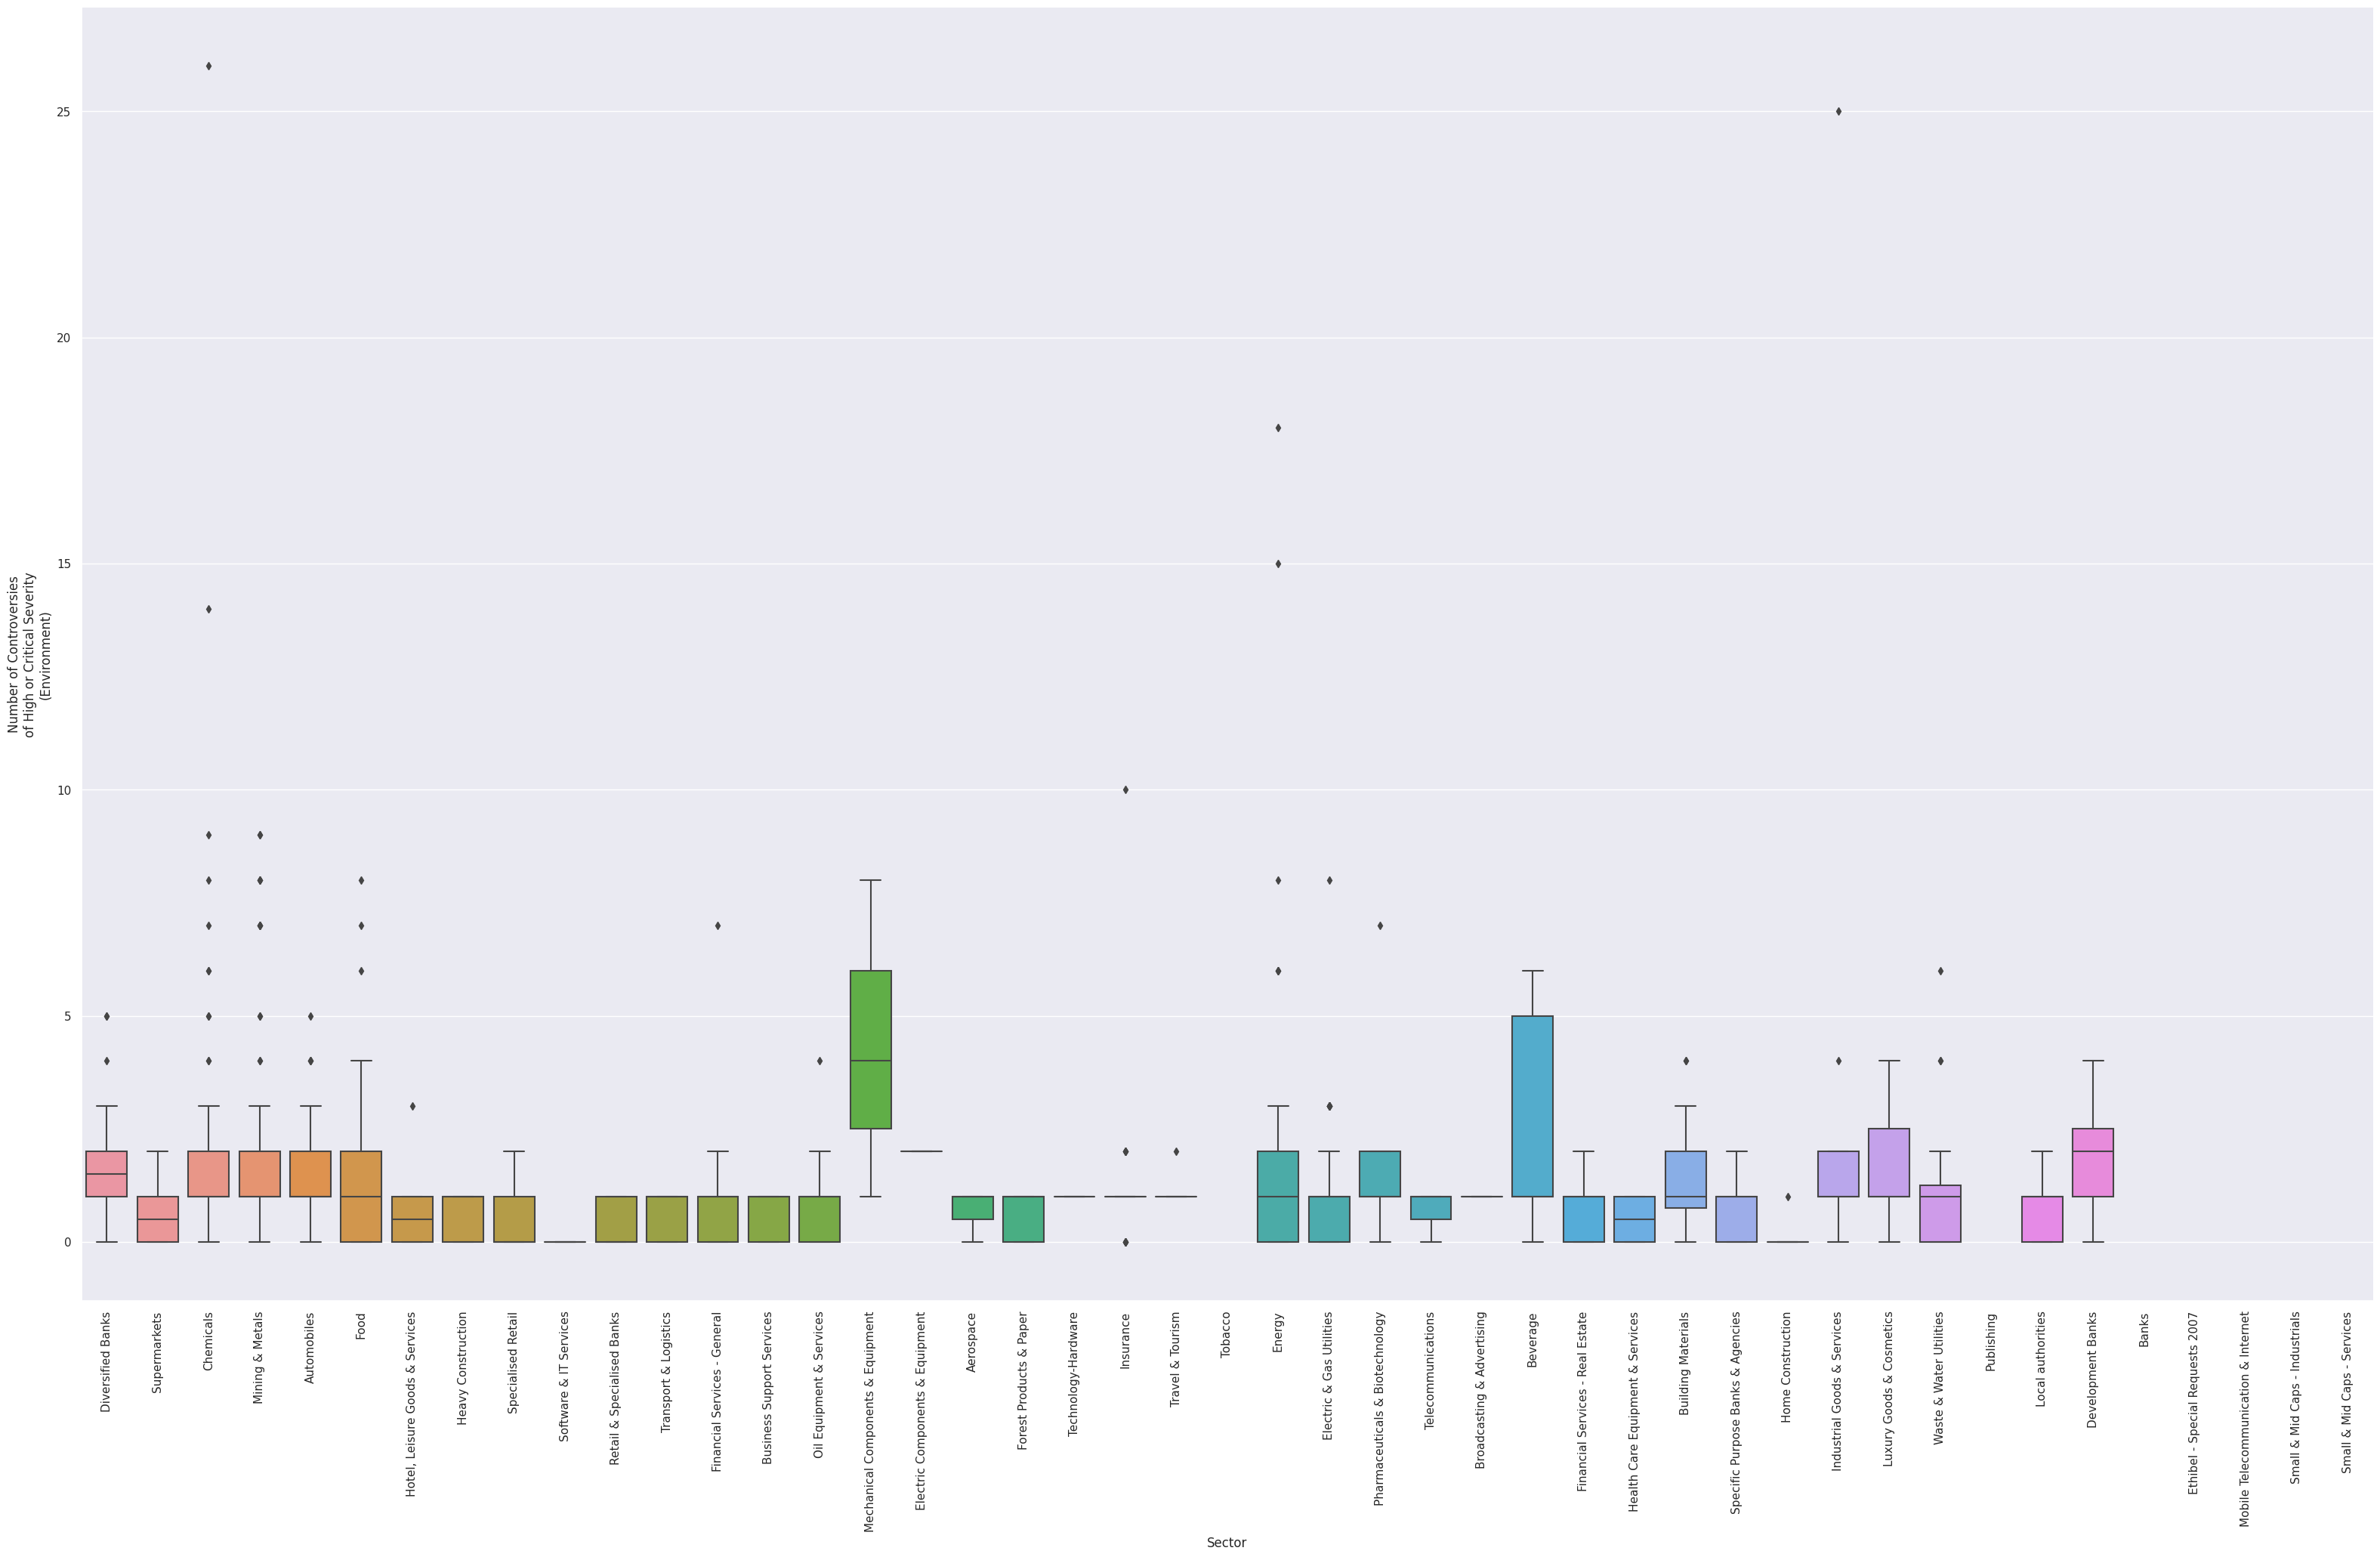

In [ ]:
# nlp_data_details.groupby(by=["Sector"])["Number of Controversies\nof High or Critical Severity\n(Environment)"].mean()
g = sns.catplot(data=nlp_data_overview, x="Sector", y="Number of Controversies\nof High or Critical Severity\n(Environment)", kind="box", height=18, aspect=1.8)
g.set_xticklabels(rotation=90)

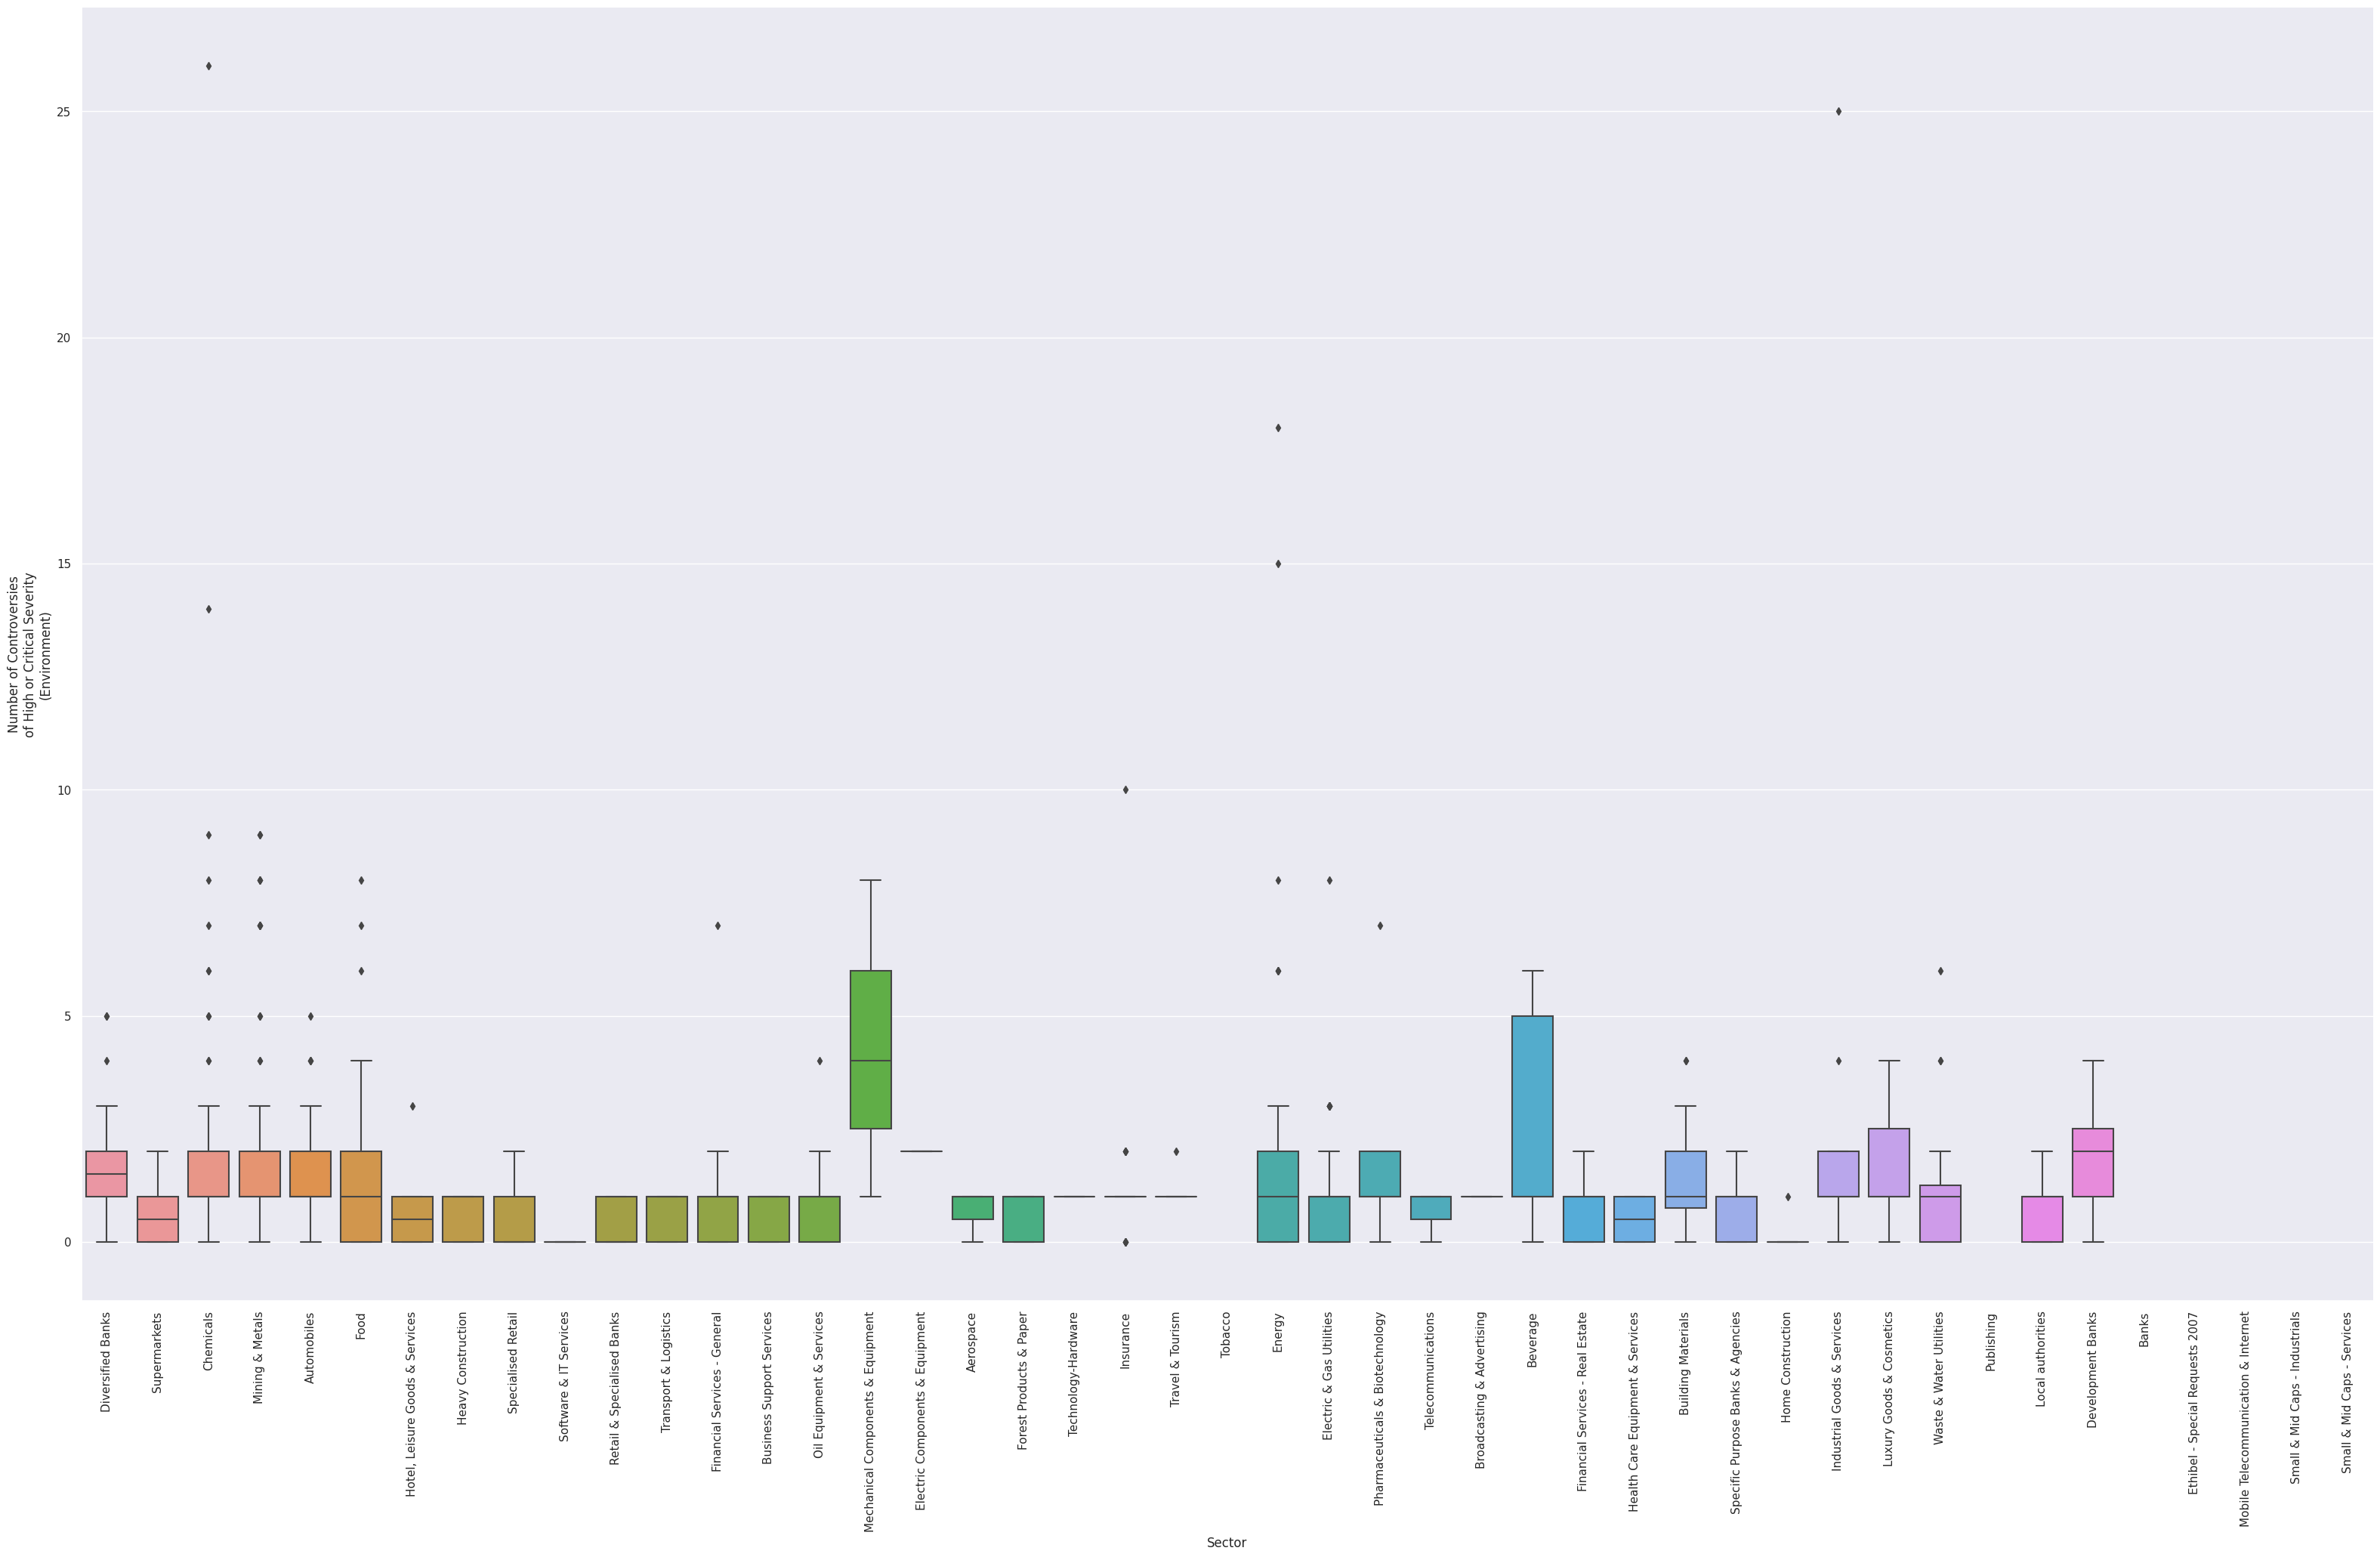

In [ ]:
g = sns.catplot(data=nlp_data_overview, x="Sector", y="Number of Controversies\nof High or Critical Severity\n(Environment)", kind="box", height=18, aspect=1.8)
g.set_xticklabels(rotation=90)

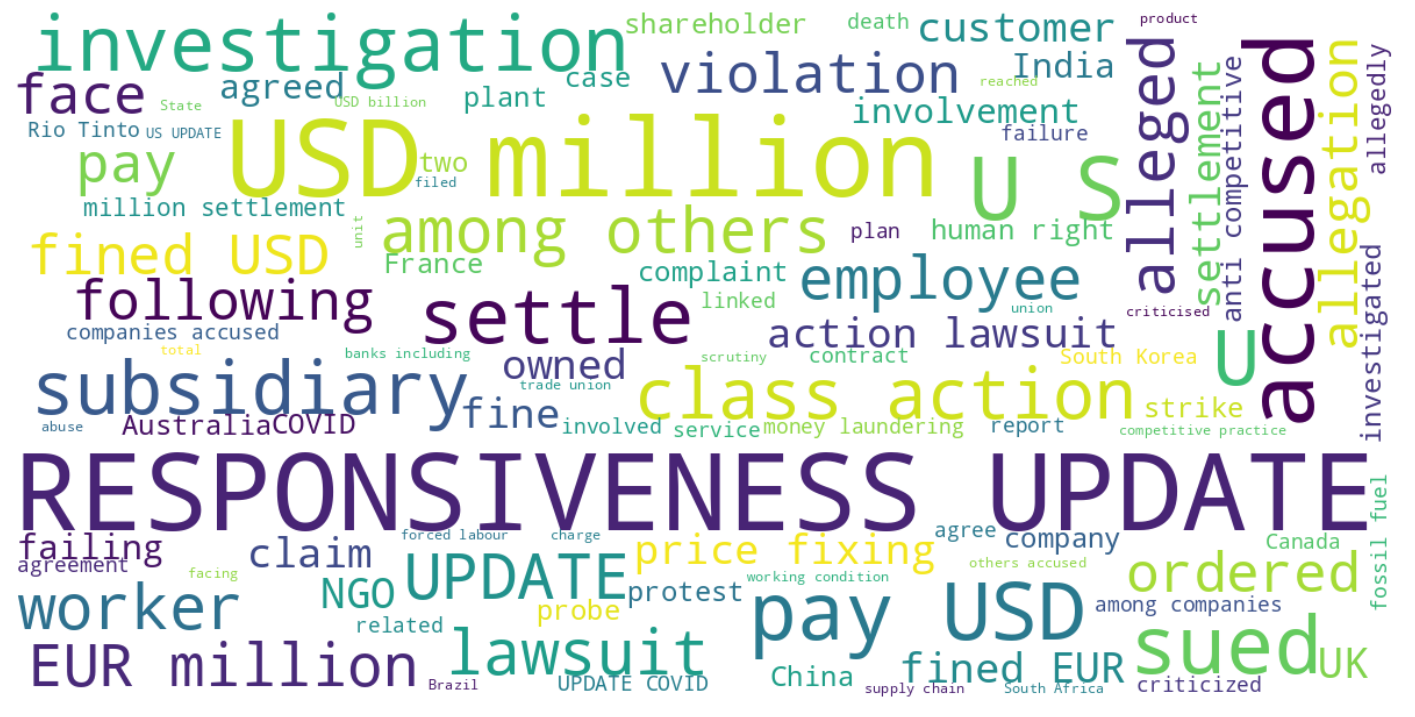

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = nlp_data_details["Controversy\nTitle"].values
text = " ".join(text)

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", scale=3).generate(text)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

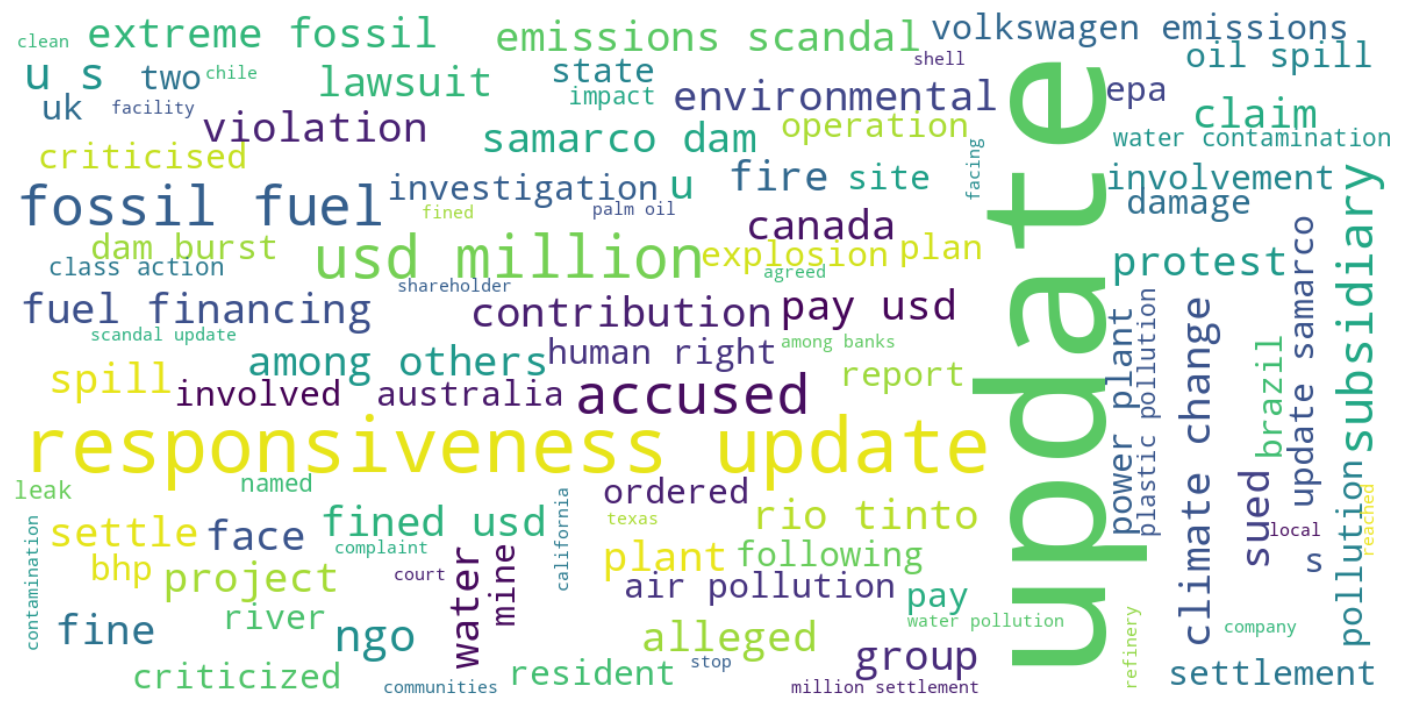

In [ ]:
text = nlp_data_details[nlp_data_details["Related\nDomain"].str.contains("Environment")]["Controversy\nTitle"].values
text = " ".join(text)
text = text.lower()

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", scale=3).generate(text)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

In [ ]:
nlp_data_details["Controversy\nTitle"]

0        RESPONSIVENESS UPDATE: Commonwealth Bank of Au...
1        RESPONSIVENESS UPDATE: Commonwealth Bank of Au...
2        Commonwealth Bank of Australia among 15 financ...
3        Commonwealth Bank of Australia scrutinised for...
4        UDPATE: Criminal Charges against the Commonwea...
                               ...                        
45063    A strike organized after NH Hoteles announced ...
45064    NOK imposed a EUR 44,000 penalty for engaging ...
45065    Halcon accused of safety violations by the US ...
45066    Gas pipe snapped loose causing leak and explos...
45067              Opponents attempt to destroy GMO trials
Name: Controversy\nTitle, Length: 45068, dtype: object

In [ ]:
merge_data = analysis_filled_data.copy()
merge_data["ISIN"] = reg_data["ISIN"].copy()
# merge_data = merge_data.merge(nlp_data_details, how="inner", on="ISIN")
merge_data

PAI7  Zone  Country  Generic Sector  Reporting year  domesticSOE  \
0     1.000000     4       83              20            2023            1   
1     1.000000     5       37              10            2023            0   
2     0.700718     4       83              12            2023            0   
3     0.651772     4       83              10            2023            0   
4     0.586957     4       83              26            2023            0   
...        ...   ...      ...             ...             ...          ...   
9842  0.000000     0       43              10            2023            0   
9843  0.000000     0       43               7            2023            0   
9844  0.000000     0       43              35            2023            0   
9845  0.000000     0       43               6            2023            0   
9846  0.000000     5       52              14            2023            0   

      Infra / Non-Infra  Region  Income group  rating_letter_category  ...  \
0                     0       4             0                       4  ...   
1                     0       0             0                       4  ...   
2                     0       4             0                       1  ...   
3                     0       4             0                       4  ...   
4                     0       4             0                       4  ...   
...                 ...     ...           ...                     ...  ...   
9842                  0       0             0                       4  ...   
9843                  1       0             0                       4  ...   
9844                  0       0             0                       4  ...   
9845                  1       0             0                       4  ...   
9846                  1       3             1                       4  ...   

      OperatingrevenuemUSD2020  OperatingrevenuemUSD2019  \
0                          0.0                       0.0   
1                          0.0                       0.0   
2                          0.0                       0.0   
3                          0.0                       0.0   
4                          0.0                       0.0   
...                        ...                       ...   
9842                       0.0                       0.0   
9843                       0.0                       0.0   
9844                       0.0                       0.0   
9845                       0.0                       0.0   
9846                       0.0                       0.0   

      OperatingrevenuemUSD2018  OperatingrevenuemUSD2017  Profitmargin2021  \
0                          0.0                       0.0               0.0   
1                          0.0                       0.0               0.0   
2                          0.0                       0.0               0.0   
3                          0.0                       0.0               0.0   
4                          0.0                       0.0               0.0   
...                        ...                       ...               ...   
9842                       0.0                       0.0               0.0   
9843                       0.0                       0.0               0.0   
9844                       0.0                       0.0               0.0   
9845                       0.0                       0.0               0.0   
9846                       0.0                       0.0               0.0   

      Profitmargin2020  Profitmargin2019  Profitmargin2018  Profitmargin2017  \
0                  0.0               0.0               0.0               0.0   
1                  0.0               0.0               0.0               0.0   
2                  0.0               0.0               0.0               0.0   
3                  0.0               0.0               0.0               0.0   
4                  0.0               0.0               0.0               0.0  

In [ ]:
#nlp_controv_data = pd.read_excel("nlp/Controversies.xlsx", sheet_name=1)
#nlp_controv_data

In [ ]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings('ignore')

raw_text = nlp_data_details[["Controversy\nTitle"]]
raw_text["Controversy\nTitle"] = raw_text["Controversy\nTitle"].str.replace("[^a-zA-Z#]", " ")
raw_text = raw_text[raw_text["Controversy\nTitle"].notnull()]
raw_text["Controversy\nTitle"] = raw_text["Controversy\nTitle"].apply(lambda x: ' '.join([word for word in x.split() if len(word) > 3]))
raw_text["Controversy\nTitle"] = raw_text["Controversy\nTitle"].apply(lambda x: x.lower())
stop_words = stopwords.words("english")
tokens = raw_text["Controversy\nTitle"].apply(lambda x: x.split())
tokens = tokens.apply(lambda x: [word for word in x if word not in stop_words])

# stemming, lemmatiziation, wordnet... etc.
documents = []
for idx in range(len(tokens)):
  if idx in tokens:
    text = " ".join(tokens[idx])
    documents.append(text)
documents[0:5]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['responsiveness update commonwealth bank australia among financial entities facing grievances australian indigenous people financial support santos barossa project',
 'responsiveness update commonwealth bank australia scrutinised using surveillance data monitor staff productivity',
 'commonwealth bank australia among financial entities facing grievances australian indigenous people financial support santos barossa project',
 'commonwealth bank australia scrutinised using surveillance data monitor staff productivity',
 'udpate criminal charges commonwealth bank australia selling consumer credit insurance dismissed australian federal court']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

max_features = 1000
n_gram_range = (1,3)
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=max_features, max_df=0.5, use_idf=True, ngram_range=n_gram_range)
vectorized_documents = vectorizer.fit_transform(documents)
terms = vectorizer.get_feature_names_out()

vectorized_documents[0:5]

<5x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 48 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.cluster import KMeans

num_clusters = 44 # number of sectors
k_means = KMeans(n_clusters=num_clusters)
k_means.fit(vectorized_documents)
clusters = k_means.labels_.tolist()

In [ ]:
from sklearn.utils.extmath import randomized_svd

u, sig, vt = randomized_svd(vectorized_documents, n_components=num_clusters, n_iter=100, random_state=42)
for i, comp in enumerate(vt):
  terms_comp = zip(terms, comp)
  sorted_terms = sorted(terms_comp, key=lambda x:x[1], reverse=True)[0:5]
  print(f"Extracted: {i}:")
  print("------------------------------------------")
  for term in sorted_terms:
    print(term[0])
  print()

Extracted: 0:
------------------------------------------
update
responsiveness
responsiveness update
million
fined

Extracted: 1:
------------------------------------------
million
fined
fined million
lawsuit
settle

Extracted: 2:
------------------------------------------
action
class
class action
lawsuit
action lawsuit

Extracted: 3:
------------------------------------------
accused
among
others
among others
companies

Extracted: 4:
------------------------------------------
sued
alleged
among
investigation
others

Extracted: 5:
------------------------------------------
fined
action
class
class action
responsiveness

Extracted: 6:
------------------------------------------
among
others
among others
million
settle

Extracted: 7:
------------------------------------------
financing
ngos
faces
bank
involvement

Extracted: 8:
------------------------------------------
investigation
practices
anti
competitive
anti competitive

Extracted: 9:
------------------------------------------
pri

In [ ]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=c37eae346c7bd1e0b1f0f14be3fc6a564d3927568822cac1dcf5d4eed07c1da3
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=e98e51ee943b752b9c65bf7103c3a240697091bbc43ecc95428707a82b8de778
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


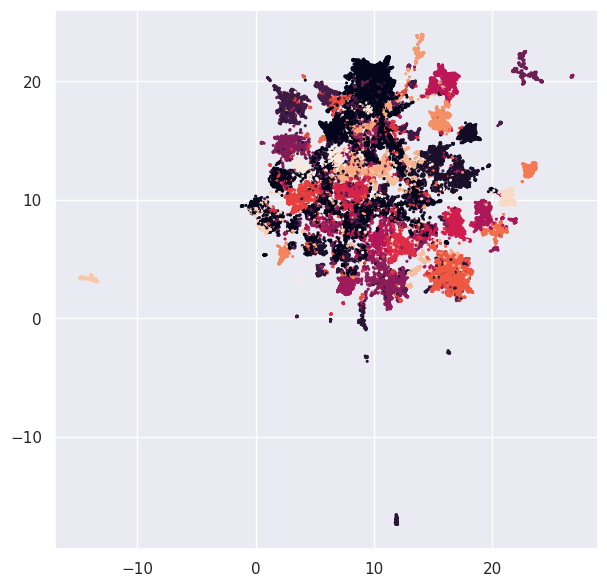

In [ ]:
import umap

topics = u * sig
embedding = umap.UMAP(n_neighbors=100, min_dist=0.5, random_state=42).fit_transform(topics)
plt.figure(figsize=(7,7))
plt.scatter(embedding[:, 0], embedding[:, 1], c=clusters, s=5, edgecolor="none");

In [ ]:
X,y = vectorized_documents, nlp_data_details["Severity Score"]
agg_scores = []

kf = KFold(n_splits=5, shuffle=True)
for i, (train_index, test_index) in enumerate(kf.split(X)):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  xgb_reg = xgb.XGBRegressor()
  xgb_reg.fit(X_train, y_train)
  score = xgb_reg.score(X, y)
  agg_scores.append(score)
  print("Folded Result:", score)
print("Average Score:", np.mean(agg_scores))

Folded Result: 0.41684934264568274
Folded Result: 0.4163202805172599
Folded Result: 0.4148058441348196
Folded Result: 0.4139363207185387
Folded Result: 0.4206619597791329
Average Score: 0.41651474955908674


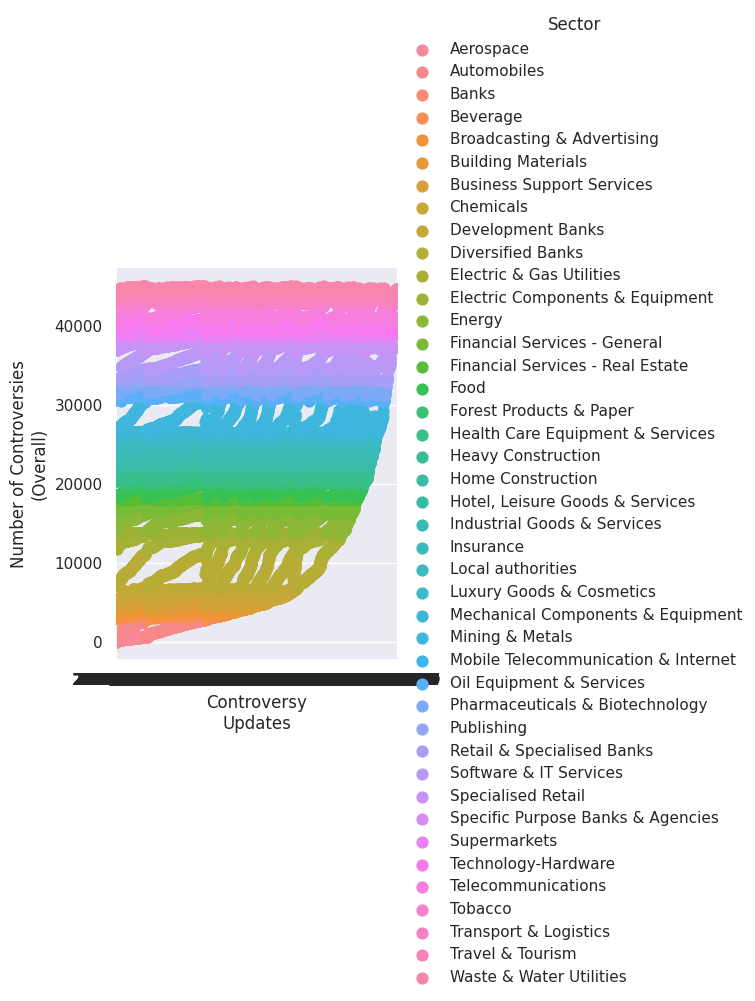

In [ ]:
controv_by_sector = nlp_data_details.groupby(by=["Sector", "Controversy\nUpdates"])[["Number of Controversies\n(Overall)"]].count().cumsum()
controv_by_sector.reset_index(inplace=True)
sns.catplot(controv_by_sector, x="Controversy\nUpdates", y="Number of Controversies\n(Overall)", hue="Sector", kind="point")